In [2]:
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
data = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all-new.npy") 
labels = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all-newY.npy")
extra = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all-new-data.npy")
pairs = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all-new-pairs.npy")

print("Finished loading data.")
print(labels)
print(f"There are {np.unique(labels).shape[0]} unique labels.")
print(data.shape)


Finished loading data.
['ar-nsubj' 'ar-case' 'ar-nummod' ... 'zh-advmod' 'zh-obj' 'zh-punct']
There are 335 unique labels.
(199849, 32)


In [4]:
USE_PRECISE_LABELS = False
if not USE_PRECISE_LABELS:
  remove_colon = np.vectorize(lambda x: x if ':' not in x else x.split(':')[0])
  labels = remove_colon(labels)

In [6]:
NUM_CLUSTERS = 60
TRAINING_SIZE = 20000

print(f"Training on {TRAINING_SIZE / data.shape[0] * 100:.3f}% of available data.")

kmeans = KMeans(n_clusters=NUM_CLUSTERS)

data_to_fit = data[np.random.randint(low=0, high=data.shape[0], size=TRAINING_SIZE)]
kmeans.fit(data_to_fit)
cluster_identities = kmeans.predict(data)

print("Finished training.")

Training on 10.008% of available data.
Finished training.


Cluster 0 (2587 words)
[-0.04691792  0.10457056 -0.02062639 -0.02107478  0.04167276  0.08000377
 -0.21731843 -0.01080625  0.04659143 -0.02263036 -0.03802066  0.32335627
  0.05861531  0.10043783  0.415914    0.02903917  0.10563958  0.10773128
 -0.2211164   0.05609139 -0.07334291  0.0212103   0.00716247 -0.41091958
 -0.01237438 -0.14255582  0.05616782 -0.00852359  0.10618351  0.00891449
  0.02828157  0.07790551]
{'obl': 483, 'conj': 425, 'nmod': 364, 'acl': 239, 'obj': 206, 'appos': 119, 'advcl': 114, 'ccomp': 99, 'punct': 68, 'nsubj': 67, 'xcomp': 64, 'case': 54, 'cc': 47, 'amod': 43, 'advmod': 37, 'flat': 33, 'mark': 31}
0.5117991
[['El primer ministro francés , el socialista Lionel Jospin , intenta recuperar la iniciativa política y el apoyo del electorado tradicional de izquierdas destinando los frutos de la bonanza económica a gastos públicos y recortes de impuestos .'
  '17' 'apoyo']
 ['El valor del mercado discográfico en 1999 se situó en 65.800 millones de pesetas , un 2,4% menos

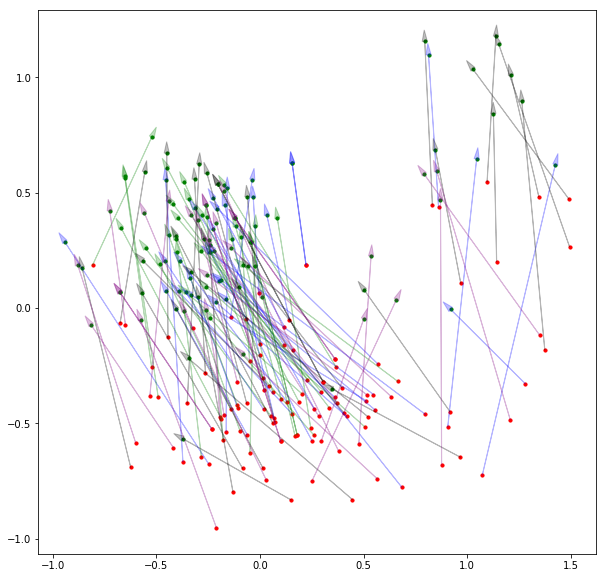

Cluster 1 (2301 words)
[-0.12895627 -0.02200157  0.0569358  -0.02019845  0.01611274  0.00590024
  0.2119147  -0.0571089  -0.16461346  0.09523819  0.11318819 -0.05178287
  0.12945653 -0.0272727  -0.00539837 -0.12338787 -0.10864559  0.05320202
 -0.09045228  0.01817201 -0.01607341  0.02438564  0.02861211 -0.07998288
 -0.13341421  0.04671651  0.02151368 -0.01921915  0.06648938 -0.13431579
  0.07748479 -0.1599335 ]
{'nmod': 401, 'punct': 325, 'case': 269, 'cc': 207, 'obj': 172, 'compound': 132, 'obl': 130, 'advmod': 88, 'nsubj': 84, 'acl': 74, 'det': 68, 'amod': 48, 'iobj': 43, 'appos': 41, 'mark': 41, 'conj': 32, 'aux': 29, 'dep': 24, 'nummod': 24}
0.6140318
[["Mais sa carte de crédit est refusée et elle demande au stand de hot-dog de lui avancer 20 dollars , disant qu' elle doit acheter un foulard pour sa tante malade , mais c' est un client qui lui offre ces 20 dollars ."
  '15' 'lui']
 ['El artillero Víctor Hugo "Tucho" Antelo marcó los dos goles que dieron el empate a Blooming , dirigi

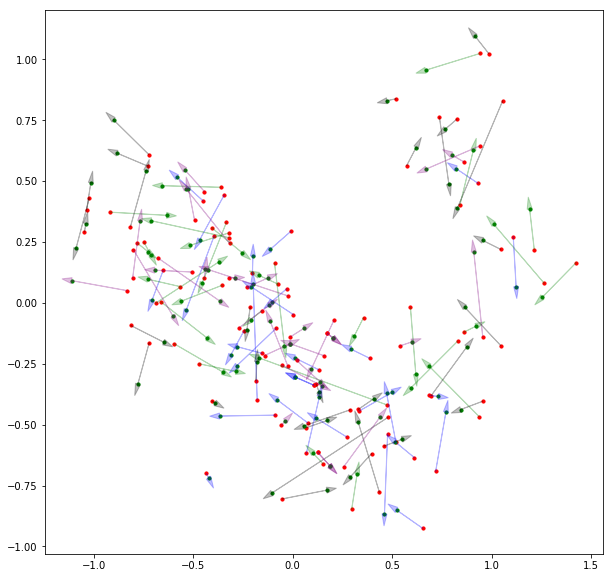

Cluster 2 (3628 words)
[ 0.01229491 -0.05527531 -0.09358883  0.12690365  0.00409017 -0.06976423
 -0.2234393   0.0899621   0.0264982  -0.23543888 -0.08417872 -0.11010204
 -0.02869225  0.06474233  0.05627391  0.0916165   0.11061431 -0.09362887
  0.07434971 -0.03368416  0.08871234 -0.05398117 -0.17235698 -0.04316185
  0.3276034  -0.27913108  0.00364022  0.04533316 -0.14477098 -0.11914881
  0.14774624  0.04879856]
{'amod': 2316, 'nmod': 583, 'flat': 293, 'compound': 136, 'obl': 49, 'nsubj': 41, 'appos': 37, 'obj': 37, 'nummod': 22}
0.6669903
[['ويبلغ عدد المشردين في كونتية لوس انجليس نحو 84 الف شخص بينهم تسعة الاف طفل بينما لا تتسع المراكز الخاصة لاستقبالهم سوى ل 13600 سرير .'
  '19' 'الخاصة']
 ['Los guiris me pillan más lejos y puedo hablar de una manera más libre , pero me corta un poco opinar de gente española y me parece poco ético .'
  '23' 'española']
 ["La chaîne BBC World News est réputée pour son indépendance et l' objectivité de son analyse de l' information et des faits divers .

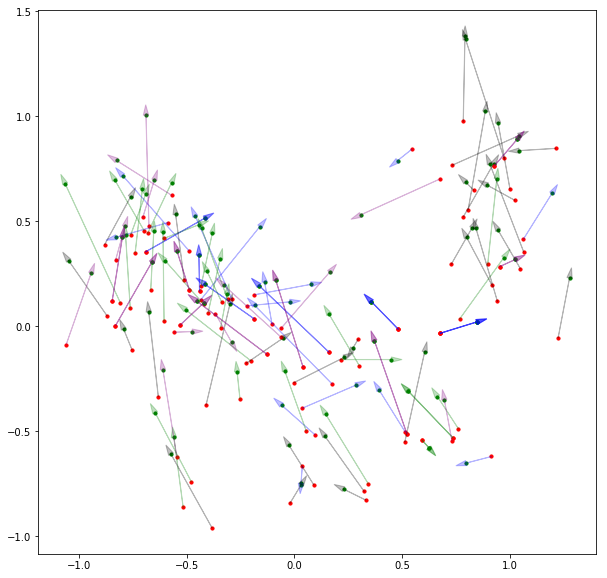

Cluster 3 (3809 words)
[ 8.43918417e-03  1.14038689e-02  5.02995402e-02 -2.19605472e-02
  2.92137917e-02 -3.62639781e-04  3.25271115e-02  5.43248355e-01
  3.25109772e-02 -4.58709523e-02  3.39618884e-02  8.03357810e-02
 -1.82831138e-01 -3.58507708e-02  2.58805752e-01 -3.16776615e-03
 -1.18200362e-01  1.02387927e-01  1.44574106e-01  2.08141822e-02
  1.56726018e-02 -2.10387126e-01  3.38939056e-02 -3.47375497e-02
  5.16409054e-03 -1.02490913e-02  1.10347755e-01 -1.18026612e-02
  4.30881605e-02  5.18748462e-02  1.70720201e-02 -1.07112780e-01]
{'obl': 731, 'conj': 387, 'obj': 383, 'nmod': 376, 'acl': 315, 'ccomp': 307, 'appos': 182, 'nsubj': 163, 'xcomp': 156, 'advcl': 146, 'dep': 122, 'parataxis': 81, 'advmod': 77, 'case': 60, 'punct': 49, 'amod': 42, 'csubj': 37, 'cc': 35, 'flat': 35, 'mark': 25}
0.43483603
[['I have no inside information , but I have been following links today that strongly indicate that Google is damn serious about securing permanent control of the leading edge browser t

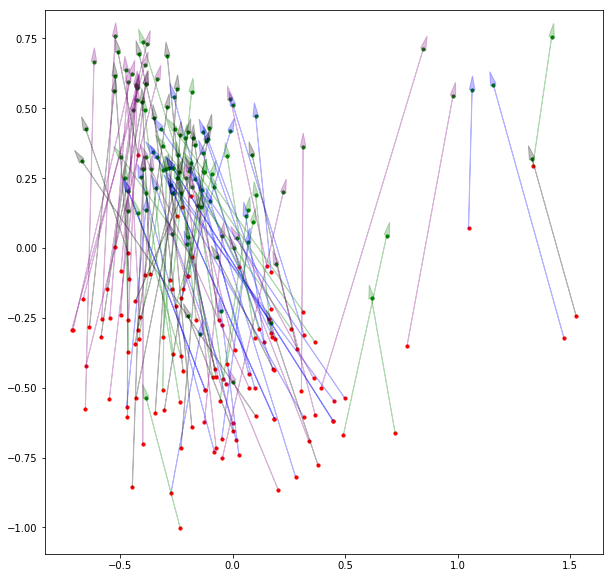

Cluster 4 (6476 words)
[-0.06077527 -0.09014805  0.10466616  0.02285787 -0.0260394   0.02724124
 -0.11289246  0.12693997  0.01560564 -0.03465774 -0.01187386  0.18194842
  0.06123523 -0.0971853   0.2023891  -0.03164037 -0.16147612 -0.11569152
 -0.04264513  0.0137834   0.0529488  -0.19576643  0.00812056  0.06333693
  0.11210435  0.05118986 -0.07290712  0.0546676  -0.07166313  0.03810307
  0.03379486  0.07671147]
{'obj': 3035, 'obl': 815, 'xcomp': 702, 'nsubj': 580, 'nmod': 430, 'case': 115, 'advmod': 113, 'compound': 96, 'ccomp': 92, 'acl': 84, 'advcl': 48, 'iobj': 40, 'amod': 39, 'conj': 39, 'parataxis': 37, 'flat': 33, 'punct': 33, 'csubj': 29, 'det': 26, 'fixed': 22}
0.51822996
[['Hosogaya pertama direncanakan untuk melakukan serangan udara ke Dutch Harbor , diikuti serangan amfibi ke Pulau Adak , 480 mil di sebelah barat .'
  '12' 'serangan']
 ['In Deutschland liegen mehrere Haftbefehle gegen den ehemaligen Staats - und Parteichef vor , unter anderem wegen seiner Verantwortung für di

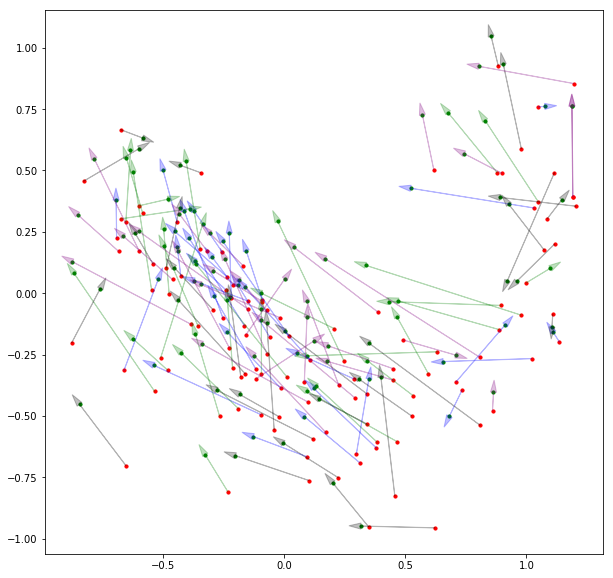

Cluster 5 (3736 words)
[-0.12158242  0.1008514   0.04212584 -0.07302023  0.00495933 -0.11103902
 -0.31762907 -0.09395158  0.01829511 -0.02536148  0.15357901  0.01132596
  0.22613634 -0.2090416  -0.29579368  0.01927556 -0.13564551  0.04460287
  0.31447127 -0.03237908  0.01768474  0.45286554 -0.07229618 -0.00371149
 -0.08789051 -0.05147831 -0.02533921 -0.03126523  0.14526525  0.03499109
 -0.02295035 -0.19175142]
{'punct': 3721}
0.28786868
[['Ofertas .' '1' '.']
 ['Aucun intérêt à venir dans cet hôtel qui ne mérite aucune étoiles surtout pour le prix affiché !'
  '17' '!']
 ['" Sería bonito jugar la final contra el Barcelona .' '9' '.']]


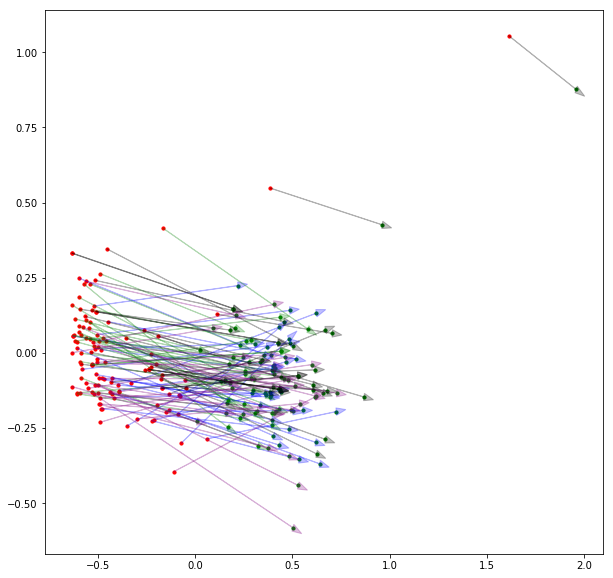

Cluster 6 (2660 words)
[-0.08851162 -0.0897982  -0.12783186  0.01144592  0.00737125  0.13169375
 -0.0268529  -0.29677048 -0.10764774  0.07514224 -0.00571273 -0.15750642
 -0.06244746  0.0044553  -0.1417103   0.05494129  0.08450589  0.04600813
 -0.23293471  0.05255896 -0.03637613  0.15172051 -0.14354718  0.04716242
 -0.1517717  -0.07309444 -0.02131425  0.06730152 -0.28347856  0.00781359
 -0.02999947  0.05724683]
{'advmod': 581, 'mark': 324, 'nsubj': 321, 'obl': 298, 'case': 208, 'cc': 159, 'punct': 144, 'nmod': 137, 'aux': 54, 'amod': 49, 'acl': 45, 'det': 44, 'obj': 34, 'root': 34, 'cop': 33, 'discourse': 33, 'advcl': 27, 'compound': 24, 'conj': 21}
0.36052835
[['Aber was traurig ist das die Bedienung nicht besonders auf dem Kunden eingeht sonder lieber mit Ihre Kolegin über das Wochende spricht .'
  '0' 'Aber']
 ['Sin embargo , Quintanilla cree que " los nuevos yacimientos de empleo , tales como el agroturismo , las sociedades cooperativas o las sociedades limitadas laborales conseguir

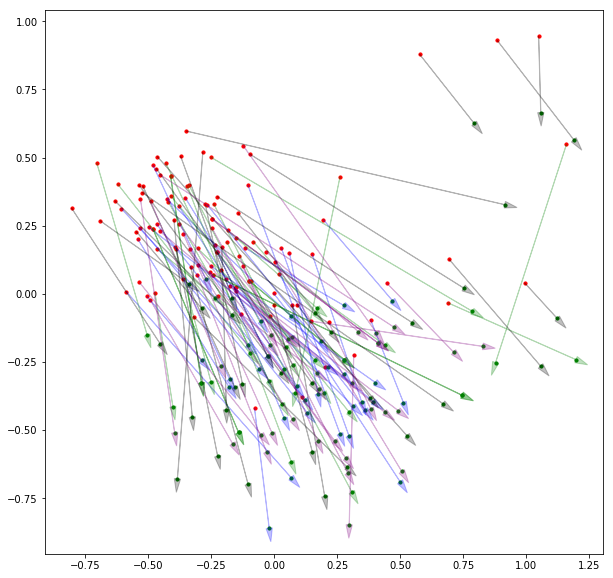

Cluster 7 (4142 words)
[-0.01177377  0.0324763   0.04318098  0.18269312 -0.01982858  0.00202761
 -0.13063356  0.0220145  -0.07367916  0.01765785  0.13232712 -0.04189224
 -0.23331864 -0.09066246  0.00095974  0.04289214  0.00196175  0.00860564
 -0.08282788 -0.00324996 -0.00747114  0.0402622   0.03824813 -0.04267252
  0.35039842 -0.1211995  -0.09410525  0.06522593 -0.00824206  0.01020724
  0.02254074 -0.00846398]
{'flat': 812, 'nmod': 701, 'fixed': 338, 'amod': 321, 'compound': 306, 'punct': 286, 'nummod': 254, 'conj': 157, 'obj': 153, 'case': 130, 'obl': 98, 'advmod': 97, 'acl': 83, 'nsubj': 80, 'appos': 76, 'mark': 45, 'det': 44, 'cop': 41, 'xcomp': 22, 'iobj': 21}
0.5802925
[['ويحتفل سكان التاي ، الذين كانوا من البدو قديما ، كل سنتين بعيد الاويين الذي يكشفوا خلاله عن تقاليدهم في الرقص والغناء والفروسية والقتال . . . الخ .'
  '26' '.']
 ['Die Betreiber des Copyshops benutzen ausschließlich Windows - Rechner und akzeptieren keine Mac - Formatierten USB - Sticks .'
  '17' 'Sticks']
 ["Les

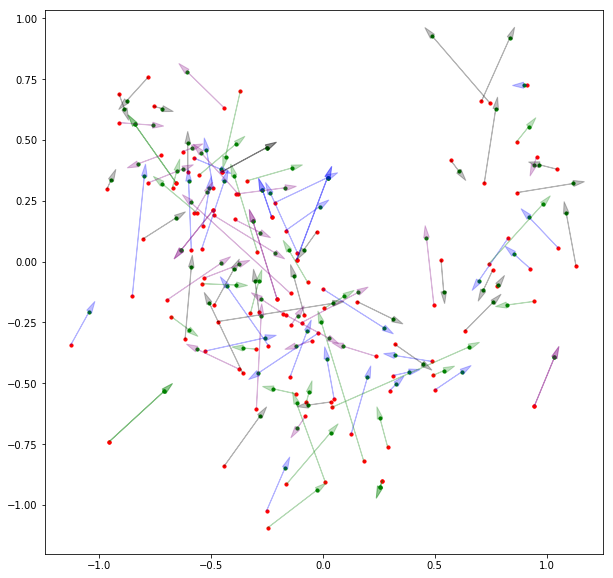

Cluster 8 (2769 words)
[ 0.09889243 -0.25890687  0.02175545 -0.00705233  0.10532059 -0.08331794
  0.0320016  -0.14979833 -0.2500549  -0.09671509 -0.13125707 -0.04252309
 -0.07808758  0.00285047 -0.0463071   0.06912576  0.13538992  0.29709256
 -0.13960798 -0.07372327 -0.064051    0.10416283 -0.00173372 -0.03836069
 -0.23236689  0.09354915  0.07661063 -0.03093135 -0.1023965   0.00344888
  0.05165595  0.13106683]
{'det': 1327, 'nsubj': 1104, 'expl': 73, 'punct': 44, 'advmod': 30, 'nmod': 30, 'obj': 27}
0.3025425
[["L' éditeur-en-chef est Corey S. Powell ." '0' "L'"]
 ['Elle obtient le prix Jean-Valcourt qui lui permet de voyager en France , en Suisse et en Italie .'
  '0' 'Elle']
 ['How is it going ?' '2' 'it']]


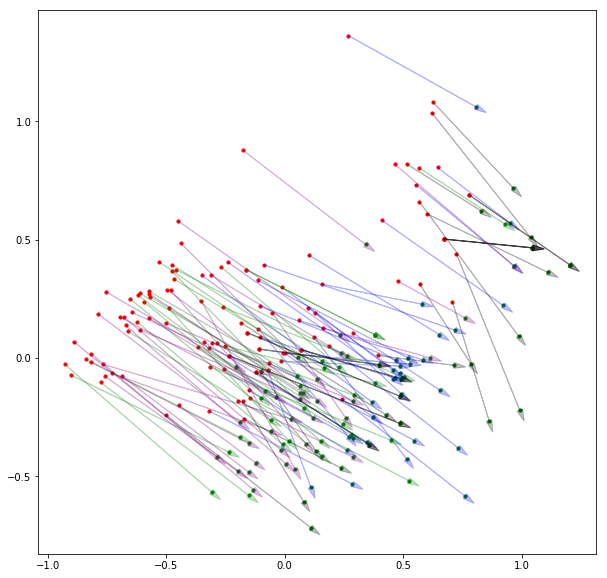

Cluster 9 (3299 words)
[-0.0252983   0.18309964 -0.19934514  0.02838376 -0.06592862  0.0343378
  0.06799547  0.01320209 -0.05436738 -0.05608189 -0.13587591 -0.00350394
  0.09755994  0.08650434 -0.00973704 -0.23022161 -0.03585012  0.00500229
 -0.08933324 -0.06903187 -0.06745631 -0.02646259 -0.2206418   0.17042553
 -0.10086428  0.05753319  0.264942    0.16467816  0.14155641  0.04737374
 -0.05546639 -0.00070605]
{'advmod': 2387, 'amod': 189, 'case': 181, 'det': 90, 'obl': 75, 'nmod': 69, 'cc': 45, 'mark': 35, 'obj': 31, 'compound': 26, 'acl': 24, 'punct': 23, 'xcomp': 21}
0.51441985
[['در این کنگره که با حضور ۵۱ تن از میهمانان خارجی از ده کشور دنیا و ۱۵۰ تن از استادان ، محققان و پژوهشگران دانشگاه\u200cهای کشور برگزار می\u200cشود ، ۲۹ مقاله درباره شخصیت و مقام علمی حکیم عمر خیام ارائه خواهد شد .'
  '40' 'خواهد']
 ['El experto reconoció que estaba " preocupado " por el elevado valor de la libra que incitaba a numerosas empresas a abandonar el país debido a la pérdida de competitividad de su

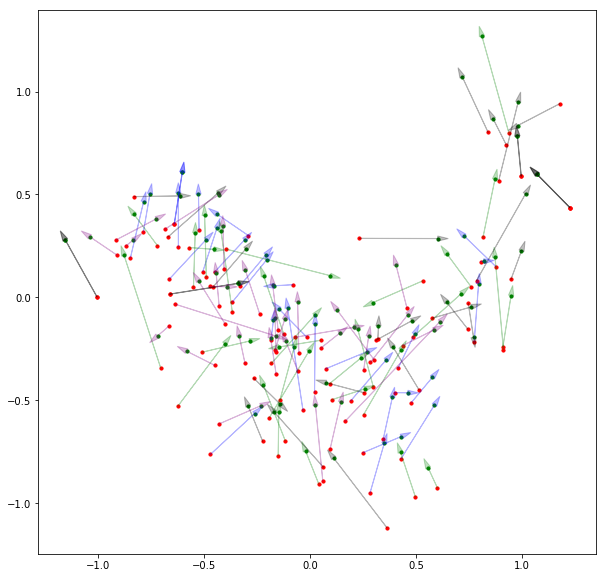

Cluster 10 (2460 words)
[ 0.01694637  0.03553369 -0.09189264  0.01969345 -0.06811038  0.00143901
 -0.12539715  0.06350827  0.32387778 -0.02895412  0.05379367 -0.16936779
 -0.1419662  -0.00227192 -0.00316367  0.12106277 -0.09086448  0.04050739
 -0.2745706  -0.01159273  0.07069335 -0.00844507 -0.10948674 -0.00076716
  0.08525155  0.05913364  0.03495959 -0.00845237  0.05382755  0.07239392
  0.1391123  -0.12291714]
{'obl': 960, 'nmod': 435, 'nummod': 379, 'advmod': 185, 'compound': 62, 'flat': 50, 'appos': 43, 'obj': 40, 'mark': 37, 'case': 36, 'amod': 35, 'punct': 27, 'acl': 26, 'dep': 22}
0.55244404
[['بلانتير ( مالاوي ) 15 - 7 ( أ ف ب ) - تأهلت اوغندا الى الدور الاول من تصفيات كأس الامم الافريقية لكرة القدم التي تستضيف مالي نهائياتها عام 2002 اثر فوزها على مالاوي 2 - 1 في اياب الدور التمهيدي اليوم السبت في بلانتير .'
  '29' 'عام']
 ['NMT 450 , Nordic Mobile Telephone , standar komunikasi seluler analog yang bekerja pada frekuensi 450 MHz . Standar ini dikembangkan dan digunakan oleh neg

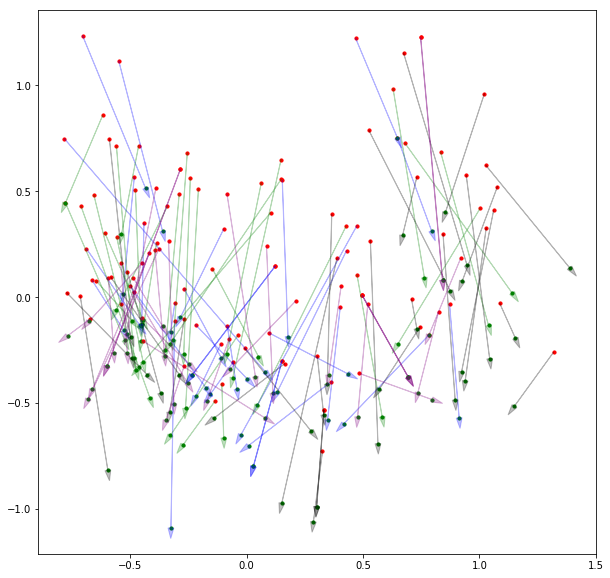

Cluster 11 (2355 words)
[ 0.28205112 -0.0761259   0.07559429 -0.19589818 -0.03751181  0.03385966
  0.00150863 -0.08607094  0.01367002 -0.00038673  0.26745948  0.09731724
 -0.00752864  0.26360306 -0.1076045   0.09619717 -0.02461479  0.09859812
  0.07903558 -0.04855297 -0.13020994  0.04169484  0.11557457  0.0422681
 -0.12278507 -0.06453849  0.03738183  0.01395421  0.14817068 -0.05243397
  0.05253306 -0.03278987]
{'punct': 1878, 'case': 79, 'nsubj': 60, 'nmod': 50, 'aux': 38, 'advmod': 26, 'appos': 24, 'det': 24}
0.67934287
[['Ya el pasado marzo , durante la cumbre extraordinaria de la UE en Lisboa , los Quince pidieron a Rusia que hiciera " honor a sus compromisos " y pusiera fin " al uso indiscriminado de la fuerza militar " en Chechenia'
  '22' '"']
 ['Äänestysaktiivisuus oli alhainen ( 40,3 % ) .' '3' '(']
 ['El candidato a la presidencia por el Partido Reformista Social Cristiano ( PRSC ) , Joaquín Balaguer , de 93 años y ciego , encabezará hoy , su mitin de cierre de campaña a cinco

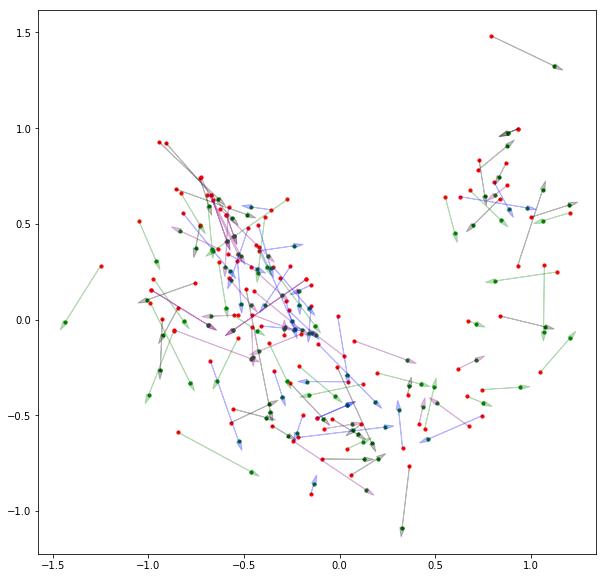

Cluster 12 (5089 words)
[ 0.02624776 -0.07497255  0.02179002  0.01069091 -0.02630732 -0.0534208
  0.04752306  0.18783614 -0.10187484 -0.00209066  0.09668173 -0.27780205
 -0.0133758  -0.04111348  0.32451767  0.01000881 -0.00661425 -0.01232531
  0.02478011 -0.07016362  0.05734302  0.11349678 -0.09131019  0.2850696
 -0.07262644  0.06204827 -0.17369539 -0.0249873  -0.13500014 -0.03862652
 -0.0418279  -0.01601992]
{'nmod': 1099, 'obl': 943, 'conj': 571, 'obj': 517, 'acl': 449, 'appos': 206, 'case': 170, 'ccomp': 155, 'xcomp': 141, 'advcl': 140, 'nsubj': 130, 'amod': 85, 'punct': 82, 'advmod': 73, 'flat': 60, 'cc': 52, 'parataxis': 34, 'mark': 25, 'det': 23, 'nummod': 22, 'compound': 21}
0.56445616
[["La réunion , qui devait s' achever vendredi soir , se poursuit ce samedi par une ultime séance marathon de négociation ."
  '7' 'vendredi']
 ['NMT 450 , Nordic Mobile Telephone , standar komunikasi seluler analog yang bekerja pada frekuensi 450 MHz . Standar ini dikembangkan dan digunakan oleh 

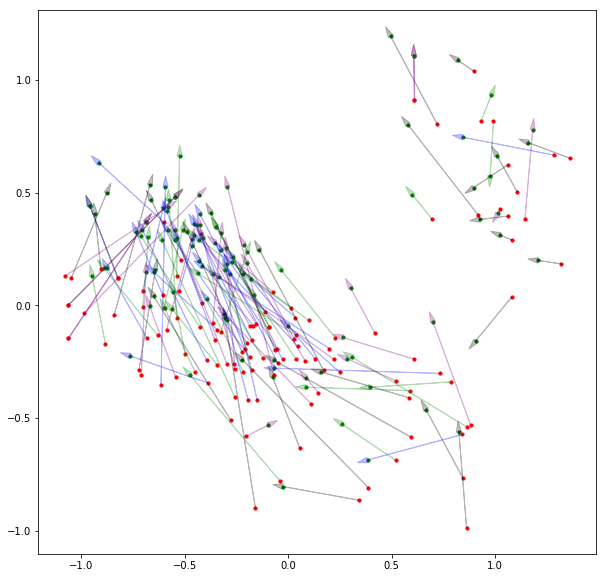

Cluster 13 (4755 words)
[-0.04034325  0.07777295  0.06462082 -0.05914431 -0.06484021  0.04214195
  0.00554735  0.01951379  0.0396415   0.0546622  -0.02730883 -0.08043301
  0.26842326  0.02664711  0.22776844  0.05477531  0.155803   -0.07559238
 -0.3009556  -0.01402007  0.01332954  0.14525005  0.05774154  0.05407715
  0.11002588 -0.08312541 -0.08814916 -0.00040524  0.10196596 -0.03526621
  0.03358983  0.22717637]
{'nmod': 1060, 'obl': 849, 'conj': 582, 'obj': 418, 'acl': 337, 'appos': 220, 'nsubj': 158, 'case': 146, 'ccomp': 140, 'advcl': 135, 'advmod': 120, 'xcomp': 119, 'punct': 91, 'amod': 72, 'cc': 49, 'flat': 45, 'det': 39, 'compound': 37, 'mark': 35}
0.6122126
[["De même , certains plats , comme la carpe farcie , ont été élaborés afin de ne pas transgresser l' interdit de séparer le grain de l' ivraie , c'est-à-dire la chair du poisson de ses arêtes ."
  '22' 'séparer']
 ['After my last day in Sydney , I will be going to Fiji before heading back to the states .'
  '3' 'day']
 ['Nam

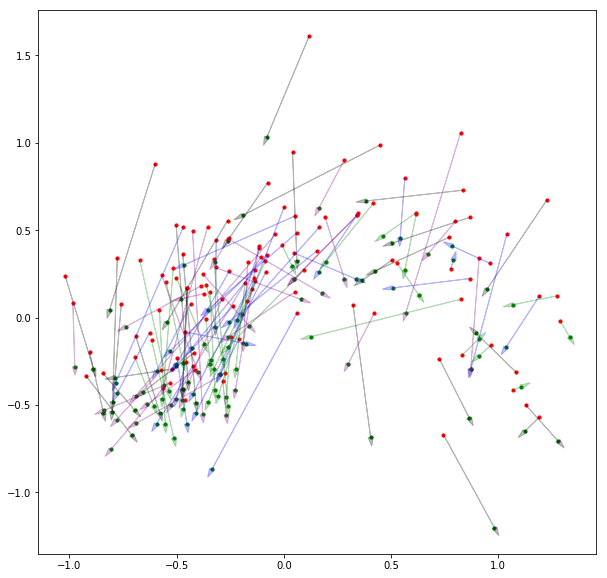

Cluster 14 (4239 words)
[-0.07746696  0.14760502 -0.17864832 -0.03385031  0.15809803 -0.09485385
  0.22160375  0.04294681 -0.29450187  0.18161853  0.12502366  0.03748472
 -0.09009839  0.07067393 -0.03721438  0.19653364 -0.18088059 -0.15369408
 -0.0141387   0.10550374 -0.12978894 -0.04801318 -0.187419   -0.02162397
 -0.06157124 -0.16414872 -0.10141198 -0.01108588  0.0687409   0.0933599
  0.07885256  0.10031317]
{'case': 3758, 'mark': 166, 'obl': 86, 'advmod': 50, 'nmod': 44, 'fixed': 27}
0.63743526
[['درسدن ( المانيا ) 15 - 7 ( اف ب ) - ذكرت الشرطة ان مواجهات وقعت عصر اليوم السبت في درسدن ( شرق ) بين حوالى 300 ناشط من النازيين الجدد كانوا يتظاهرون في وسط المدينة وبين حوالى 200 متظاهر من اليسار المتطرف .'
  '25' 'بين']
 ['El ministro egipcio del Interior , general Habib Al Adli , justificó la ampliación por otros tres años del estado de emergencia , vigente en el país desde 1981 , al considerar que es necesario para luchar contra el terrorismo .'
  '37' 'contra']
 ['Como ejemplo sirva la

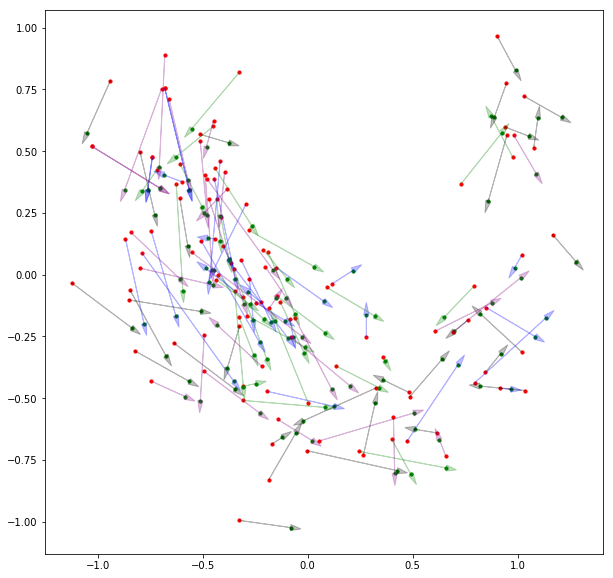

Cluster 15 (3750 words)
[-0.01481049  0.07942577  0.01834256 -0.10688303  0.11374461  0.11173937
  0.2361295  -0.02255431 -0.07382873  0.11080625 -0.14960584 -0.07379363
  0.01989033  0.11989373 -0.0048512   0.15115932  0.00834134 -0.04368423
  0.00978786  0.07981411 -0.04275323  0.03489169 -0.14742231 -0.0063144
 -0.2518013  -0.17434825  0.02350259  0.08452532 -0.03546188  0.21065854
  0.08698892 -0.01386235]
{'case': 2700, 'mark': 522, 'advmod': 155, 'nmod': 69, 'cc': 46, 'obl': 43, 'det': 40, 'acl': 21, 'punct': 21}
0.57136273
[['Terminal memiliki ruang untuk pengembangan untuk dua jalur jet tambahandan kepasitas 6 juta penumpang tiap tahun sebelum bangunan membutuhkan perluasan .'
  '5' 'untuk']
 ['Hasta ha llevado en el bolsillo la brújula que le regaló un votante de este estado " para que fuera siempre por el buen camino " , según le dijo .'
  '27' 'según']
 ['وقال " في المرة الاولى كانت رائحته نتنة الى حد دفع سائق الباص الى منعه من الصعود " في اشارة الى رفضه الاغتسال وادمانه على

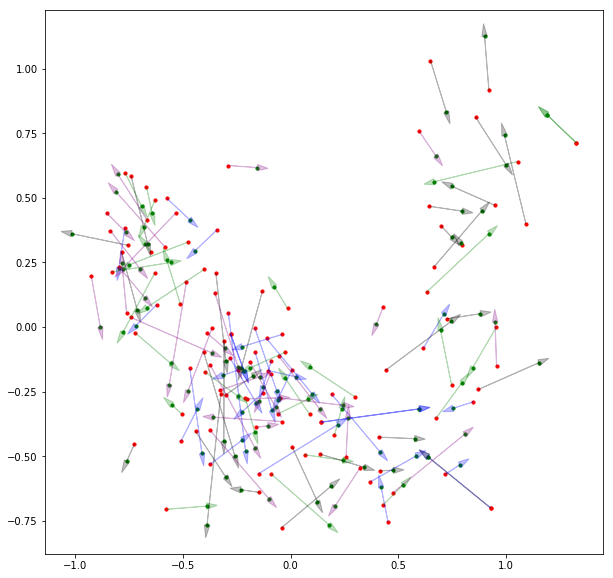

Cluster 16 (3457 words)
[ 0.20656784  0.09376223 -0.19183765 -0.06316982  0.16481997 -0.05339352
  0.12238038 -0.00164952 -0.00168842  0.02549092  0.02618354 -0.11990926
  0.07039268 -0.0128862   0.01638373 -0.19429062 -0.09714075 -0.05161921
 -0.07753026 -0.02503916 -0.1743516  -0.01890775  0.2766369  -0.08126903
 -0.00673915 -0.1338981   0.02559004  0.04749335 -0.12817812  0.23971413
 -0.01545135 -0.00927425]
{'nsubj': 1401, 'mark': 717, 'obj': 275, 'case': 237, 'obl': 151, 'nmod': 114, 'cc': 107, 'acl': 105, 'advmod': 81, 'punct': 42, 'compound': 38, 'det': 36, 'amod': 33}
0.67501384
[['این مساله در واگذاری امور مشاهده می\u200cشود و انتظار می\u200cرود که دست\u200cاندرکاران بخش مخابرات به این تصمیم به نحو شایسته جامه عمل بپوشانند .'
  '21' 'عمل']
 ['آیا تو ادعا نکردی که زیاد فرزند ابوسفیان است و حال آن که پیامبر ) ص ( فرمود : الولد للفراش و للعاهر الحجر .'
  '4' 'که']
 ['吳 廷琰 的 活動 使 他 實質 上 獲得 了 公開 身份 , 這 時 法國 人 決定 讓步 , 以 安撫 民族 主義 鼓動 者 , 還 要求 他 勸說 保大 皇帝 加入 他們 .'
  '2' '的']]


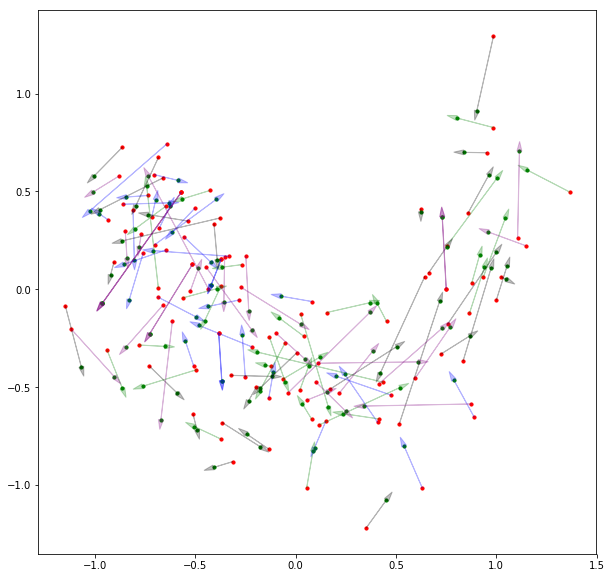

Cluster 17 (2828 words)
[ 0.06979498  0.00942534  0.06315032 -0.02818956 -0.01520699 -0.06899355
  0.25256383  0.3014179   0.05397853  0.02021145 -0.05009793  0.00696444
  0.03108018 -0.04395525  0.71349216  0.03084768 -0.07303294 -0.08271321
 -0.03183967 -0.0874035   0.0126223   0.43821707  0.06657574  0.11958186
  0.193517    0.05761053  0.14408119  0.0157516  -0.03221212  0.04068832
  0.04107989  0.02136549]
{'conj': 660, 'ccomp': 308, 'obl': 301, 'advcl': 276, 'acl': 220, 'punct': 195, 'parataxis': 191, 'obj': 103, 'xcomp': 78, 'nmod': 76, 'cc': 72, 'appos': 55, 'case': 43, 'nsubj': 40, 'advmod': 38, 'aux': 30, 'dep': 29, 'amod': 21}
0.38771418
[['Warna parhelion akhirnya menjadi putif saat berada di lingkaran parhelis ( jika dapat terlihat ) .'
  '6' 'berada']
 ['Y lo hace con acierto : el resultado es una versión estilizada , conservadora en el mejor sentido del término , y permite a los cantantes concentrarse en el plano vocal sin pedirles grandes exigencias dramáticas .'
  '10'

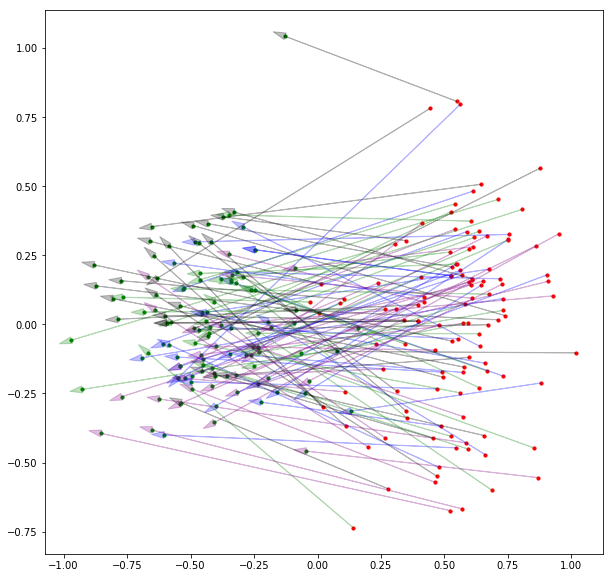

Cluster 18 (4396 words)
[ 0.09563532  0.00697751 -0.13028713  0.04640911 -0.12461647  0.12756486
  0.11849152 -0.09601676  0.13332355  0.00546999 -0.1576408  -0.01726138
 -0.09956983  0.26499608 -0.06002565  0.05722255 -0.05286483 -0.05336443
  0.11984187  0.07113176  0.1096305   0.10624783  0.1372748  -0.07591119
  0.02265211  0.00190698 -0.24136111 -0.08378974  0.00890897 -0.16776496
 -0.2961164  -0.01555532]
{'cop': 2211, 'aux': 1099, 'obj': 514, 'case': 229, 'expl': 116, 'iobj': 46, 'nmod': 37}
0.45667857
[['Wo suchen sich diese Jugendlichen dann die überlebensnotwendige emotionale Zuwendung ?'
  '2' 'sich']
 ['EUROOPAN UNIONIN NEUVOSTO , joka ottaa huomioon Euroopan yhteisön perustamissopimuksen ja erityisesti sen 43 artiklan , ottaa huomioon kommission ehdotuksen ( 1 ) , ottaa huomioon parlamentin lausunnon ( 2 ) , sekä katsoo , että eläinlääkärintarkastuksista yhteisön sisäisessä kaupassa sisämarkkinoiden toteuttamista varten 11 päivänä joulukuuta 1989 annetussa neuvoston direkt

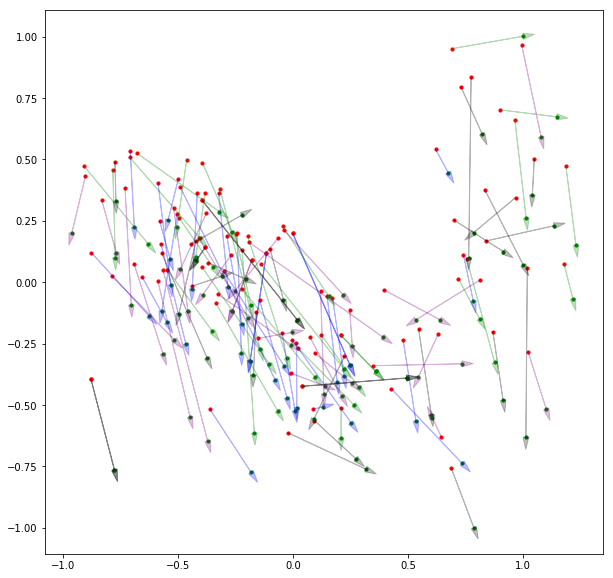

Cluster 19 (2252 words)
[ 0.06225815 -0.19728033  0.20238326 -0.02702499 -0.04957663  0.1853036
  0.00458739 -0.10325998 -0.05988811 -0.08648842  0.14459062  0.00500586
 -0.1082531  -0.1280161  -0.0896008  -0.11872061  0.05063889 -0.0224113
  0.02620788  0.22218025  0.13514134  0.13400687  0.05870477  0.0739355
  0.01140093 -0.17973912  0.2849932   0.2980617   0.050942    0.01093353
  0.23156531 -0.03608936]
{'punct': 1910, 'nsubj': 80, 'obl': 35, 'advmod': 27, 'appos': 23, 'nmod': 23, 'case': 21}
0.68162954
[['Les écartes incluent Le Coudray ( ferme ) , Les Cent Arpents ( ferme ) , Le Petit Moulin ( ancien moulin ) et Les Moines ( ancien Moulin ) .'
  '7' ')']
 ['A dos años de las elecciones presidenciales y legislativas , el primer ministro se ha fijado como meta bajar al final de su mandato el nivel de retenciones obligatorias , que alcanzó un récord en 1999 , al de 1995 ( un 43,7 por ciento ) , cuando el neogaullista Jacques Chirac se convirtió en " número uno " del Estado .'
  '45

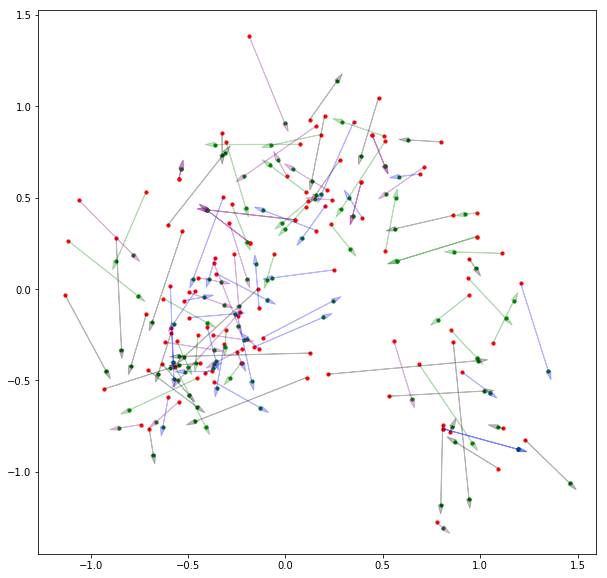

Cluster 20 (2487 words)
[-0.09848774  0.1627404  -0.00579161  0.06299136  0.06716727  0.11072431
  0.07513702 -0.0313372   0.0721673  -0.00121901 -0.10759521 -0.02924142
  0.00530937  0.16736901 -0.05421181 -0.20683865 -0.04614978  0.09533445
  0.0389527   0.11889528 -0.05931464  0.03990349 -0.09234087  0.1322451
 -0.09923163  0.10452086  0.10569213 -0.08950033 -0.06524149 -0.01339432
  0.2299352   0.03414656]
{'advmod': 925, 'nummod': 292, 'det': 215, 'aux': 177, 'case': 157, 'nmod': 132, 'amod': 93, 'mark': 79, 'obl': 64, 'nsubj': 55, 'clf': 54, 'compound': 34, 'obj': 33, 'cc': 26, 'appos': 22}
0.5383428
[['نيقوسيا 15 - 7 ( اف ب ) - في ما يلي بعض المواضيع المتوقعة الاضافية لليوم السبت : ايران / مجتمع طهران تتلاحق الحلقات الدراسية والمؤتمرات التي تعقد في ايران بحثا عن اجراءات يمكن ان تسهل عودة المهاجرين الايرانيين ، وخصوصا المتمولين منهم الذين يعيشون في المنفى في اوروبا والولايات المتحدة ويشكلون قوة مالية لا يستهان بها لبلد يمر في مرحلة تطور .'
  '37' 'عودة']
 ['Tässä lausunnossa pide

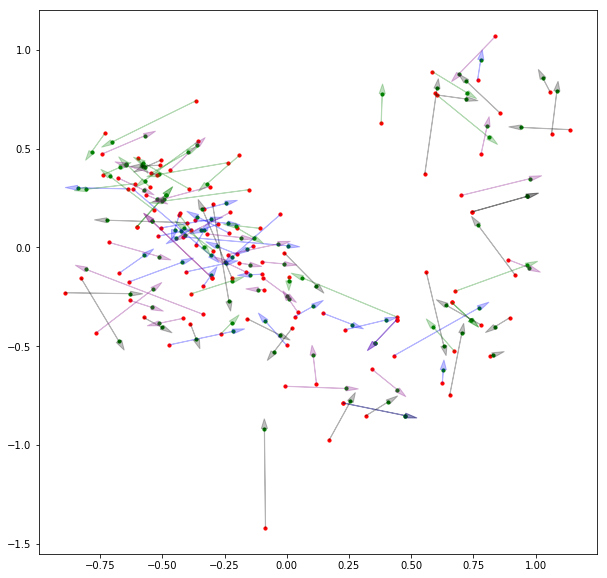

Cluster 21 (3648 words)
[-0.07060741 -0.30871174  0.15211506 -0.07778305  0.11804467 -0.13783291
  0.1279192  -0.04088729  0.05207919  0.00929368 -0.00216278  0.03320454
  0.00597784  0.12179773 -0.056309   -0.00903109 -0.0516709   0.0780497
 -0.04625233 -0.06961911 -0.09646739 -0.02272293  0.04403143 -0.1636818
  0.10931579  0.13009544 -0.00463947  0.21085678  0.06133602 -0.06720757
 -0.09791497 -0.05933585]
{'nsubj': 1520, 'det': 769, 'nmod': 579, 'obj': 210, 'obl': 115, 'acl': 63, 'iobj': 62, 'case': 50, 'advmod': 32, 'compound': 32, 'flat': 27, 'punct': 23, 'aux': 22, 'fixed': 22}
0.50554216
[['Heidän on erityisesti huolehdittava siitä , että heidän nimeämänsä todistuksia myöntävät viranomaiset ovat a ) asemassa , joka takaa heidän puolueettomuutensa ja sen , että heille ei koidu minkäänlaista suoraa kaupallista hyötyä niistä eläimistä tai tuotteista , joista he laativat todistuksen tai yrityksistä tai laitoksista , joista eläimet ovat peräisin , b ) tietoisia jokaisen allekirjoitt

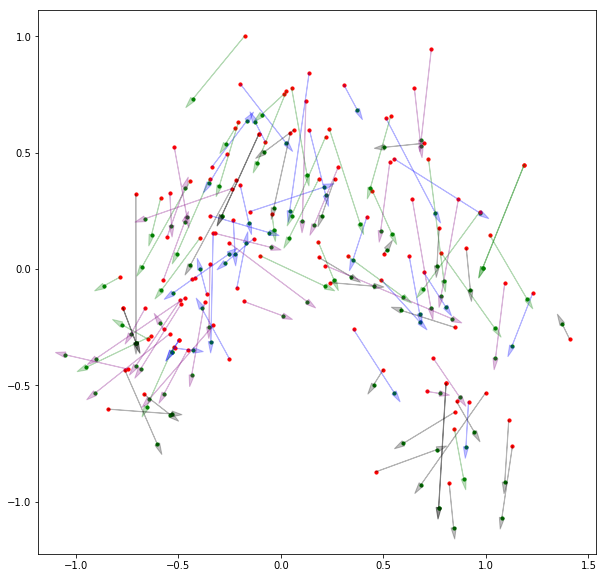

Cluster 22 (1434 words)
[ 5.7385527e-02 -4.4872101e-02 -9.9602029e-02  1.5830213e-02
 -4.2798929e-04  3.5428222e-02  1.1542327e-01  6.0609239e-01
  5.0673513e-03  1.4064956e-02 -9.0430647e-02  2.5716782e-01
  4.0574282e-02 -4.5546461e-02 -1.4589548e-01 -2.7298715e-02
 -5.1707089e-02 -2.4375284e-02 -9.5406994e-02  4.6937432e-02
 -2.1868993e-02  5.8186173e-01 -2.9672988e-02 -2.0199223e-01
  3.9476272e-02  4.6233926e-02  1.6866721e-01 -2.9418718e-02
 -4.8269454e-02  1.0065634e-02  9.8625915e-03  3.6895633e-02]
{'punct': 344, 'nsubj': 196, 'mark': 168, 'obl': 118, 'acl': 99, 'cc': 95, 'dep': 92, 'nmod': 48, 'advcl': 44, 'advmod': 43, 'ccomp': 38, 'obj': 28}
0.56255805
[['黃岩 路橋 機場 建 於 1987 年 , 是 全國 第一 個 縣級 民航 站 , 2001 年 1 月 起 , 台州 市 替代 黃岩 區 接管 該 機場 , 同時 加掛 台州 市 民航 局 牌子 .'
  '14' '站']
 ['可是 , 呂衛倫 接任 會長 的 時候 , 正 值 英國 文化 協會 的 低潮 , 在 1960 年代 , 由於 政府 削減 資助 等 原因 , 協會 被 迫 先後 結束 在 緬甸 、 斐濟 、 加勒比 海 和 非洲 及 中東 部份 地區 的 工作 , 並 將 協會 的 服務 對象 逐步 縮窄 至 西 歐 地區 , 工作 性質 也 限制 到 只有 藝術 、 科學 和 科技 領域 的 交流 層面 , 使 協會 的

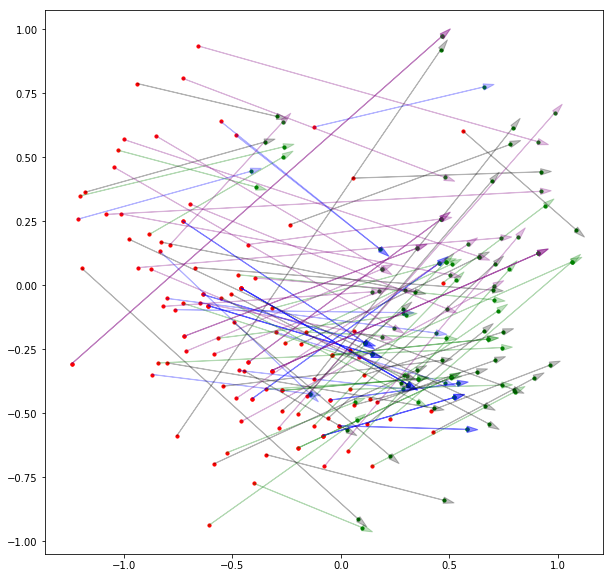

Cluster 23 (4678 words)
[ 0.03742193  0.04670043  0.05404476 -0.02228437  0.00251387  0.08622764
 -0.19789848  0.1941179   0.04253526  0.01836172  0.03501577  0.04626646
  0.17498791  0.00601188  0.18128899  0.12123372  0.17789087  0.05172085
  0.08541211  0.05837569  0.02957974 -0.24961483  0.02873602 -0.13490027
 -0.02033834  0.1341303  -0.04963106  0.099002    0.00141958 -0.05612361
  0.01550274  0.04991921]
{'nmod': 1808, 'obj': 1049, 'obl': 684, 'nsubj': 385, 'case': 111, 'compound': 73, 'amod': 66, 'det': 66, 'xcomp': 56, 'flat': 51, 'acl': 50, 'punct': 37, 'appos': 35, 'advmod': 30, 'conj': 30, 'ccomp': 28, 'iobj': 22}
0.6154541
[["I 'm inclined to say that google is doing what they can to both shape and support the growth of the most popular non-Microsoft browser out there - by taking on the leading lights in Firefox development , they 're ensuring the continued life of the project , and ensuring ( not that I think they need to ) that their voice will be heard admidst the highe

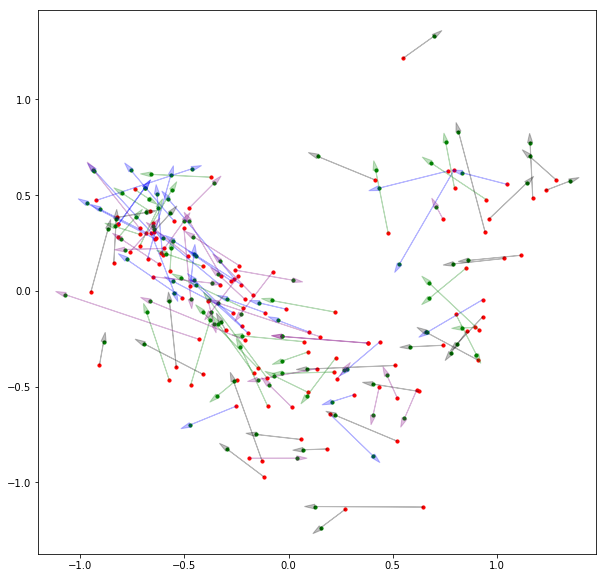

Cluster 24 (4911 words)
[ 0.08850059 -0.08148108  0.06933526  0.03789772  0.06419721 -0.04629664
 -0.27094948  0.16061756  0.04943045  0.11683927 -0.13270421 -0.02056711
  0.03947108 -0.10238555  0.11441614  0.03769138  0.10378385  0.01640218
  0.02828037 -0.04552431  0.20356318 -0.12675239 -0.09224896  0.04394519
  0.17320745 -0.14094132 -0.14040935 -0.03245075 -0.08761055  0.00917532
 -0.05031927  0.09260695]
{'nmod': 2968, 'compound': 375, 'flat': 277, 'amod': 276, 'obj': 253, 'obl': 230, 'nsubj': 86, 'xcomp': 76, 'acl': 67, 'case': 66, 'conj': 43, 'nummod': 42, 'appos': 40}
0.6776261
[['自 此 卓 義峰 便 擁有 「 丐幫 幫主 」 的 外號 .' '0' '自']
 ["Si les résultats des différentes élections à Mirabeau donnent des résultats équivalents aux résultats nationaux ou locaux , la participation est toujours plus élevée ( jusqu' à 11 % de plus en mai 2005 ) ."
  '19' 'participation']
 ['Ce premier de ses vingt-neuf longs métrages fut un énorme succès .'
  '6' 'métrages']]


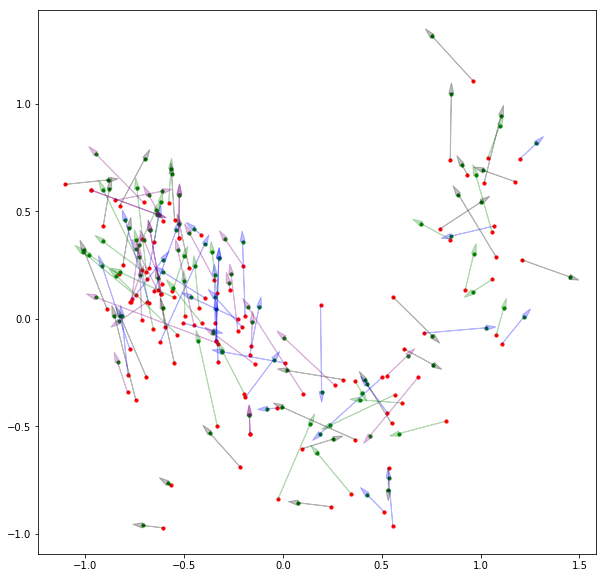

Cluster 25 (1843 words)
[ 0.00176705 -0.07238677 -0.06865039  0.01452908  0.02806473 -0.05833578
 -0.21725565 -0.65424955 -0.09071893 -0.05431138  0.12106345 -0.07870238
 -0.21093899  0.04979502  0.49822354 -0.06642842  0.08799862 -0.03714561
 -0.00734581  0.05145504  0.05516107 -0.30176738 -0.06306297  0.03240666
 -0.26103932 -0.05937683 -0.17481194  0.06396346 -0.08472418 -0.05122975
 -0.00076987 -0.1925377 ]
{'conj': 454, 'acl': 226, 'obl': 201, 'advcl': 173, 'punct': 172, 'ccomp': 142, 'nmod': 73, 'obj': 64, 'cc': 60, 'parataxis': 43, 'case': 41, 'appos': 37, 'xcomp': 30}
0.5522897
[['وقال انطونيو لاجرانيا رئيس قطاع الاتصالات والمعارض بالاتحاد الدولي للاتصالات ، إن من المتوقع أن يزور المعرض من 10 إلى 13 ألف زائر من أكثر من 100 دولة من بينها 50 دولة أفريقية ، وسيكون عنوان المؤتمر المصاحب له " أولوية لأفريقيا " ، مشيراً إلى أن المعرض سيصاحبه أيضاً منتدى للشباب ، وتم توفير تمويل من الشركات العالمية له وسيشارك فيه 110 من شباب الدول الأفريقية .'
  '40' 'أولوية']
 ['Suihkussa , kylvyssä 

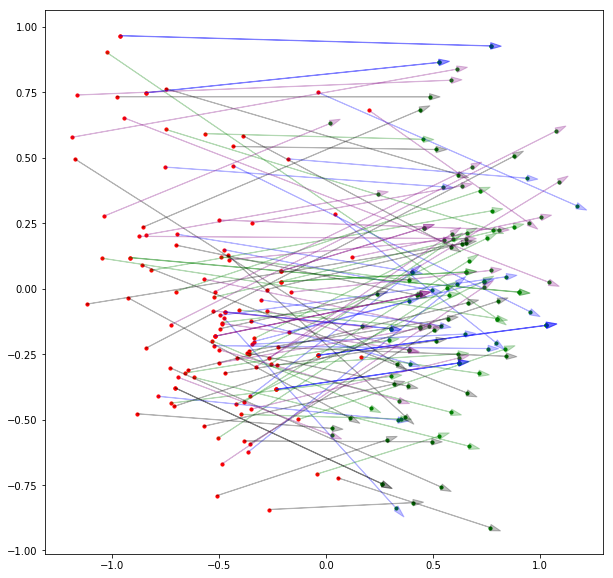

Cluster 26 (5120 words)
[ 0.11649898  0.08463239  0.13706255 -0.02888914 -0.08444668 -0.01751244
 -0.03883415 -0.02746006 -0.21668129  0.13668564 -0.04900887 -0.02641179
 -0.04087573  0.17783326 -0.0381579   0.1331599  -0.07679246 -0.30167642
 -0.09798893  0.01800216 -0.11934011 -0.04913782  0.0814771  -0.00965724
  0.00293252  0.20841503  0.32212588 -0.27974877 -0.10113777 -0.2595504
 -0.03321157 -0.22939205]
{'punct': 5054, 'mark': 21}
0.5651745
[['Viime vuoden keväällä tein File tutkii -artikkelin yhteydessä käytännöllisen kokeen siitä , miten opiskelijamassojen mielijuoma olut syntyy kotikonstein .'
  '11' ',']
 ["La présence courante d' un autel , leur situation au cœur de cimetières , leur faible disposions a éclairer le voisinage immédiat , tendent a montrer que la dernière proposition soit la bonne ."
  '6' ',']
 ["L' album de photos de police exposé au musée d' Histoire politique de la Russie de Saint-Pétersbourg révèle le visage de Raspoutine défoncé par des coups et son corp

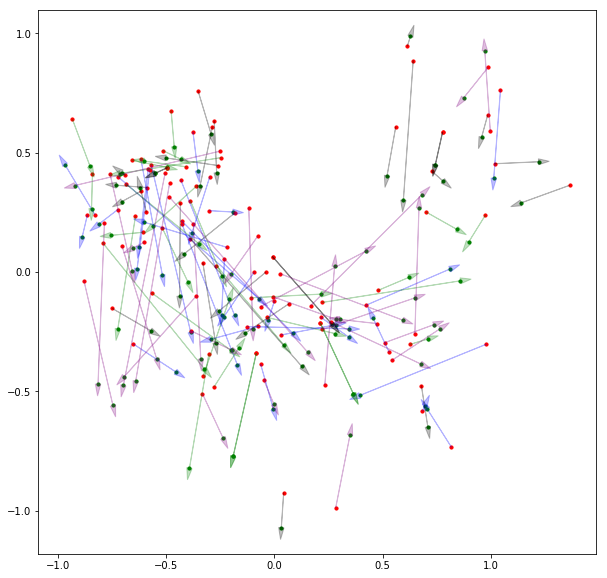

Cluster 27 (2088 words)
[-0.0422285  -0.05215666 -0.06227733 -0.00776211  0.04918579 -0.02564183
 -0.10847909 -0.18481943 -0.06970461 -0.01567651  0.05117363  0.01348691
 -0.06747056  0.06900321 -0.5905238  -0.05748818  0.21386404 -0.03753141
 -0.21021283 -0.02086192 -0.01151097 -0.43277255 -0.00947205 -0.04814739
 -0.11053085 -0.04178657 -0.10295845  0.05168222 -0.07747009 -0.06778406
  0.03495048  0.00689342]
{'nsubj': 1033, 'obl': 376, 'advcl': 148, 'advmod': 90, 'nmod': 88, 'punct': 77, 'acl': 42, 'obj': 32, 'mark': 24, 'ccomp': 22, 'csubj': 22, 'dep': 22}
0.3048318
[['Pour accompagner le lancement des ses différents Macintosh , Apple a fait appel de manière récurrente à la publicité .'
  '1' 'accompagner']
 ['Marita Koivusen vuonna 2009 hyväksytty väitöskirja käsitteli hoitohenkilökunnan tietoteknologian hy-väksyntää ja käyttöä psykiatrisessa hoitotyössä .'
  '5' 'väitöskirja']
 ['Claudia Clair , de 24 años , y Robby Blake , de 33 , también están encantados .'
  '0' 'Claudia']]


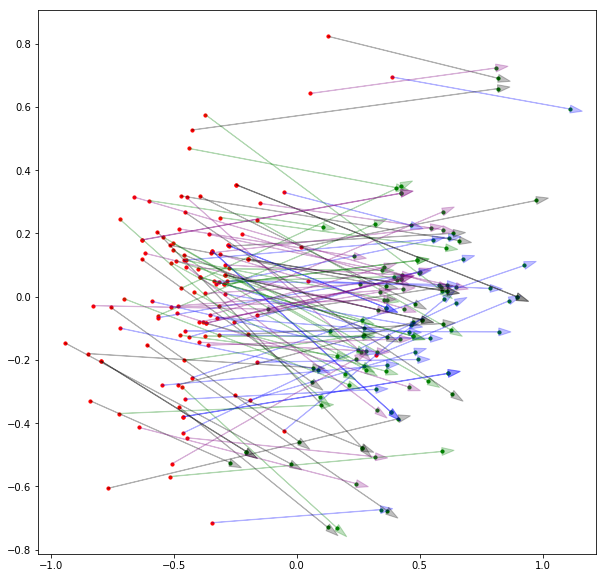

Cluster 28 (4205 words)
[ 0.14565064  0.0252887  -0.06417239 -0.04379467  0.00507667 -0.11589636
  0.06436723  0.01883806 -0.00294625 -0.06000279 -0.16665982  0.05517215
 -0.08989076 -0.29884467  0.00765081  0.04184069  0.01697732  0.03266792
 -0.07488711 -0.08379237  0.06577232 -0.02808398  0.22288004 -0.02605541
 -0.3378064   0.27803454 -0.06116512 -0.10807044  0.19742581  0.00833747
 -0.07564022  0.22145692]
{'det': 4013, 'nmod': 42, 'obj': 25}
0.6407805
[['Unos cuantos estúpidos confundieron la gimnasia con la magnesia y cortaron la carrera con el pretexto de reivindicar no sé qué .'
  '7' 'la']
 ['En cuanto a Viajes Marsans , otra de las empresas del grupo Teinver , Pascual indicó que " seguimos en expansión , la cogimos hace muchos años bajo mínimos , cuando era la propietaria la Administración , y ahora estamos en el buen camino con más de 400 puntos de venta " .'
  '8' 'las']
 ['Un sondeo realizado para El Siglo por la firma estadounidense Penn , Schoen & Berland , divulgado ho

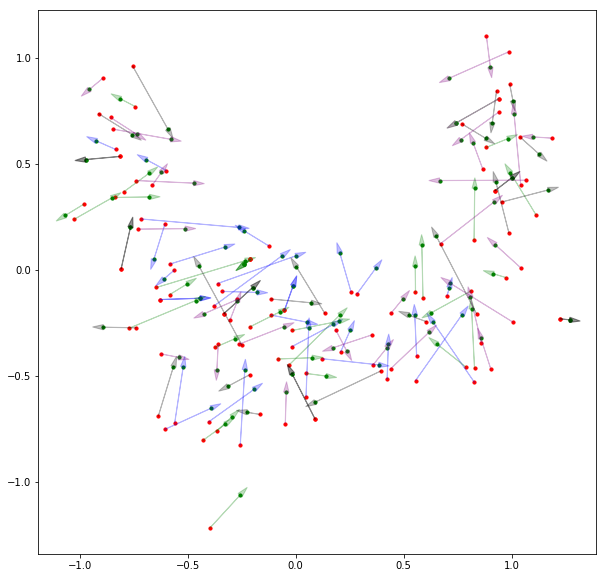

Cluster 29 (4635 words)
[ 0.04510062 -0.12609039  0.01068597 -0.04968949  0.05618162 -0.10990749
  0.02420958 -0.02409605 -0.06949162 -0.03945167  0.06735971  0.11820595
  0.07893093 -0.10327224 -0.13245884 -0.00301635  0.34127918 -0.04449936
 -0.12775686 -0.09034786  0.02540717 -0.13797015 -0.02705768 -0.07850156
  0.09527016  0.14949241 -0.08103431  0.07693639 -0.095952    0.04671634
  0.13395377  0.06081042]
{'nsubj': 3674, 'obl': 235, 'obj': 205, 'nmod': 134, 'advmod': 43, 'det': 37, 'case': 30, 'csubj': 30, 'xcomp': 23, 'amod': 21, 'ccomp': 21}
0.38308728
[["Le Conseil a globalement adopté une définition large des noms insultants ou préexistants et le ministre n' a presque jamais refusé une recommandation positive ."
  '15' 'ministre']
 ['Este hecho ha sido considerado como " grave " por el jefe de la misión de observadores de la Organización de Estados Americanos ( OEA ) , Santiago Murray , quien anunció una reunión de éstos para analizar la situación .'
  '7' 'grave']
 ['Se mahd

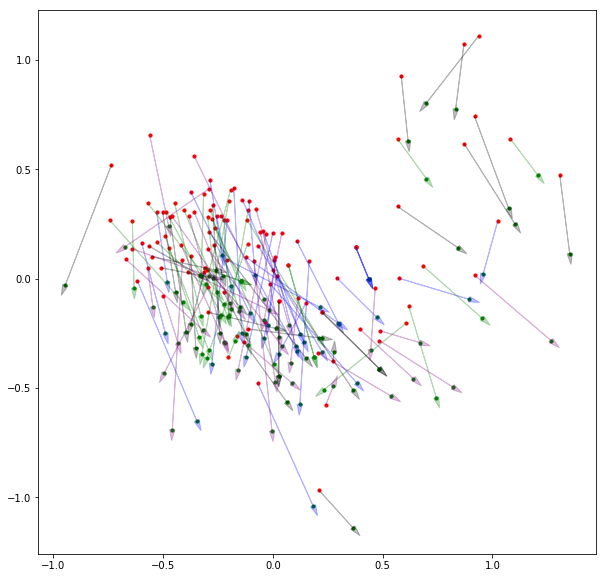

Cluster 30 (4629 words)
[-0.0837187   0.04819313 -0.05642281 -0.13061406 -0.11969391  0.11185934
  0.15322725  0.01535799  0.10003283  0.19600284 -0.01969615 -0.05983269
 -0.06081957 -0.25157437  0.01418612 -0.20511298  0.05299353 -0.0627431
  0.00356642 -0.11779174 -0.28229547  0.02115973  0.04719456 -0.14640723
 -0.06434586 -0.05558917  0.0086958   0.02347253 -0.07071961 -0.14910433
  0.23165746 -0.06475467]
{'cc': 4314, 'mark': 66, 'conj': 51, 'advmod': 30, 'punct': 27, 'case': 22, 'fixed': 22}
0.6149687
[['واضاف عرفات " نثمن عاليا المواقف الأخوية الأصيلة التي تقفونها في سوريا الشقيقة لدعم تطلعات وأماني شعبنا في نضاله لاستعادة وممارسة حقوقه الثابتة غير القابلة للتصرف ، وفي مقدمتها حقه في العودة وتقرير المصير ، وإقامة دولته الفلسطينية وعاصمتها القدس الشريف " .'
  '35' 'وإقامة']
 ['消費 者 通過 線下 十二 籃 體重 秤 稱重 , 將 數據 傳輸 到 十二 籃 體重 資料 庫 雲端 , 通過 app 、 官網 等 終端 為 消費 者 推送 個性 解決 方案 , 實現 全程 數字 化 監測 管理 , 確保 方案 科學 和 持續 性 .'
  '45' '和']
 ["Selon la bactérie en cause et le mode de contamination , la p

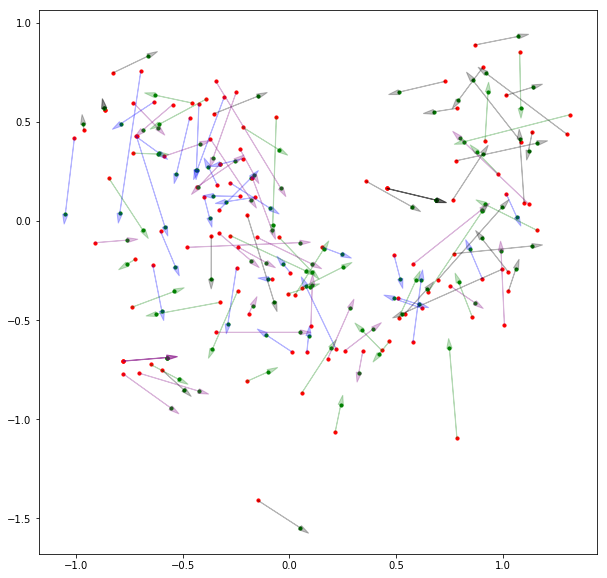

Cluster 31 (3299 words)
[-0.14959547  0.16119203 -0.04286461  0.11173431  0.00412319  0.09257342
  0.21624897  0.06575745 -0.30198422 -0.03290095  0.07706508  0.03063102
 -0.14727736 -0.08156258  0.00381462  0.11928353 -0.08209275 -0.14354126
 -0.01195948  0.17933246 -0.24927294 -0.02473857 -0.08707216 -0.02179156
 -0.05367929 -0.01510558 -0.13061222 -0.05418031  0.11147389  0.1446596
 -0.07972185  0.12538046]
{'case': 2347, 'mark': 390, 'fixed': 121, 'advmod': 89, 'obl': 82, 'cop': 41, 'nmod': 38, 'acl': 26, 'cc': 26, 'compound': 24}
0.63991475
[['Si les dices que se debe a un lapsus , cosa normal entre humanos , te mienten diciendo que ellos nunca la olvidan cuando van en moto .'
  '6' 'a']
 ["En exil en 1935 il collabore aux journaux d' émigrés allemands ;" '6'
  'aux']
 ['A partir de la vuelta 50 y durante las siguientes hasta su segunda detención , el piloto gerundense ha mantenido una impresionante lucha contra Dario Franchitti ( Reynard/Honda ) , al tiempo que defendía su séptim

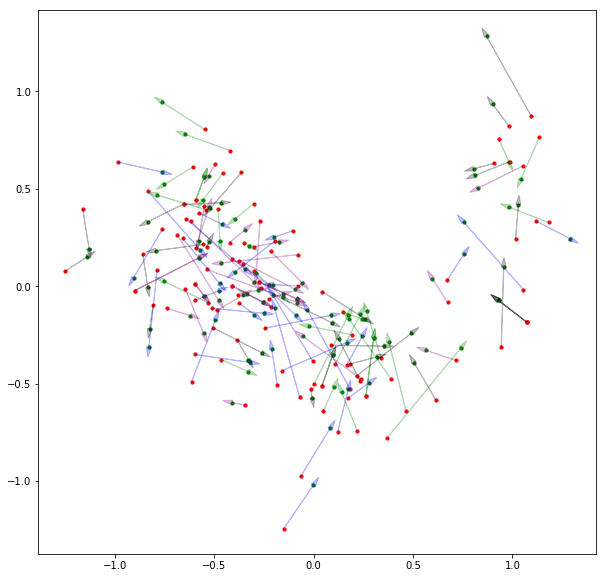

Cluster 32 (3454 words)
[ 0.0760976  -0.00415068  0.10408989 -0.00336038 -0.10351045 -0.01658648
 -0.22916561  0.12036875 -0.03368431  0.1246504   0.03160119 -0.27195352
  0.10602705  0.05783188  0.11413513 -0.06902041  0.03597563 -0.04554164
  0.0409845   0.05120952  0.11329136 -0.09766856 -0.18456542 -0.1858287
  0.10778226  0.20142333 -0.19387686  0.10146521  0.02457539 -0.05578179
  0.13960604  0.04738057]
{'nmod': 1921, 'obl': 533, 'obj': 367, 'nsubj': 178, 'compound': 72, 'case': 59, 'flat': 55, 'advmod': 51, 'amod': 36, 'acl': 30, 'iobj': 21}
0.6375232
[['Popularitas dari kendaraan ini menginspirasi Mitsubishi untuk meluncurkan berberapa edisi terbatas , seperti " Iron Cross " , " Desert Cruiser " , " White Skipper " dan " Duke " .'
  '2' 'kendaraan']
 ['En declaraciones a Europa Press , Millàs consideró que las críticas del sector renovador son un " ataque " contra su persona , pero , aun así , dijo haber propuesto a Porta la confección de una candidatura única " siempre y cuan

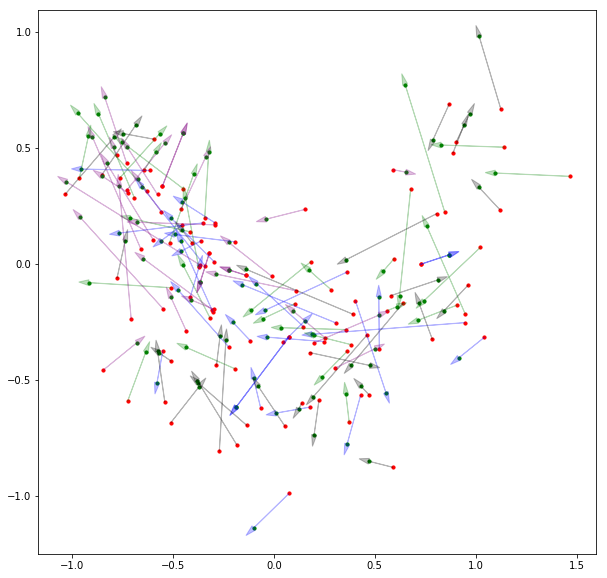

Cluster 33 (4918 words)
[ 0.26558    -0.04545112 -0.07339512 -0.20970239  0.06485447  0.05646601
  0.01164335  0.03790022 -0.11808823  0.04169444 -0.07719161  0.05795209
 -0.02314835 -0.11495662  0.00881415  0.02068893 -0.02936621  0.12530173
 -0.10453117  0.38854736 -0.42264074 -0.02953218 -0.05617802  0.15946841
  0.14422718  0.10008913 -0.08616143 -0.03548039  0.08798809 -0.12514982
  0.0242403  -0.11760238]
{'case': 4329, 'fixed': 179, 'mark': 176, 'det': 104}
0.6644756
[['Una directiva comunitaria de 13 de octubre de 1998 establecía la prohibición de comercializar gasolinas con plomo a partir de enero de 2000 , pero contemplaba la posibilidad de autorizar a un estado miembro , previa solicitud a la Comisión Europea , a continuar comercializando este combustible hasta el 1 de enero de 2005 .'
  '5' 'de']
 ['" En el PNV tenemos derecho a pensar de él lo que nos parece si realmente es un nostálgico del franquismo " , dijo Arzalluz , que también criticó al director del Euskobarómetro 

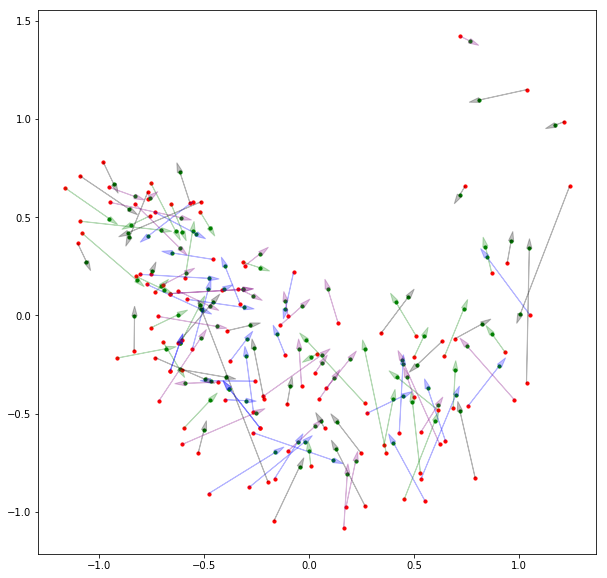

Cluster 34 (3269 words)
[-5.81213348e-02 -6.67200163e-02 -2.54235148e-01  8.61138254e-02
 -4.74153413e-03  7.96409920e-02  3.28263380e-02  4.23790477e-02
  1.66933611e-01 -5.35259545e-02  3.44207771e-02  8.16869065e-02
  1.03525482e-01  1.09253064e-01  2.18813047e-02 -1.43203363e-02
 -2.43808012e-02  1.04655437e-01 -6.83429986e-02 -1.61954202e-04
 -6.67186603e-02 -8.75759497e-02  7.01239659e-03  1.92477375e-01
 -2.33747914e-01  2.75757819e-01  1.16520457e-01 -1.05605319e-01
  1.71594381e-01  1.90774389e-02  8.47055614e-02  2.87452675e-02]
{'nummod': 1487, 'det': 468, 'obl': 221, 'amod': 219, 'nmod': 170, 'obj': 168, 'nsubj': 130, 'advmod': 115, 'compound': 74, 'case': 51, 'dep': 43, 'punct': 23}
0.54615116
[['Unos 4,2 millones de dominicanos están convocados hoy martes a las elecciones presidenciales en el país , en las que compiten tres candidatos principales : un veterano caudillo reformista ciego y dos jóvenes líderes liberales .'
  '2' 'millones']
 ["Karena Hj Sariani berprinsip ba

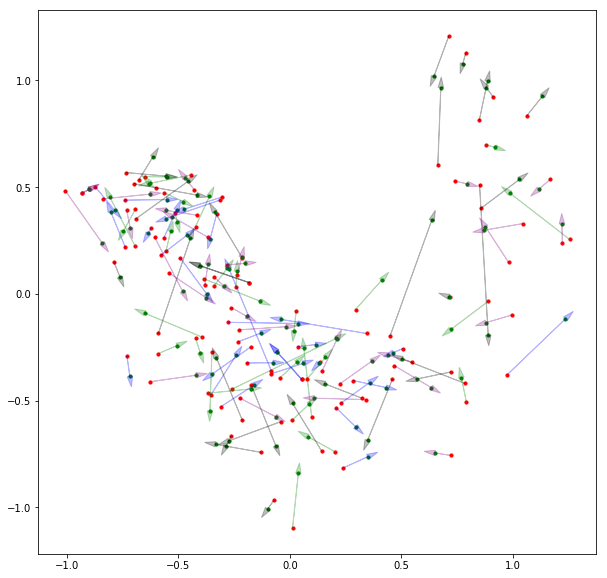

Cluster 35 (3826 words)
[-0.00056009  0.04103921 -0.16168182 -0.04600145 -0.13550274  0.02591937
 -0.08237427  0.08335306 -0.09203156 -0.346823    0.04619618 -0.05544059
 -0.03516114  0.09872165  0.09154414  0.05416568  0.08011472  0.1070243
 -0.00925141 -0.16883677  0.01824672 -0.07935517 -0.06996412  0.07411287
  0.23297575 -0.23904783  0.05434097 -0.08142541 -0.05496202  0.02452648
 -0.07281911  0.00494302]
{'amod': 2570, 'nmod': 295, 'acl': 233, 'advmod': 154, 'det': 117, 'flat': 96, 'compound': 51, 'obl': 51, 'case': 32, 'nummod': 32, 'xcomp': 26, 'obj': 25, 'appos': 21, 'conj': 21}
0.6763226
[['Hibruannya berupa AVOD ( Audio Video on Demand ) pribadi pada pesawat Project XM atau layar utama pada pesawat non - Project XM . Musik disediakan oleh radio satelit XM . Huruf pada tiket pesawat merujuk pada kelas yang diperlihatkan di situs webnya , bocoran yang diberikan pada sertifikat pembaruan Aeroplan 2007 seperti ini : Tango ( R , K , N , G , P , E , T ) , Tango Plus ( B , H , V , 

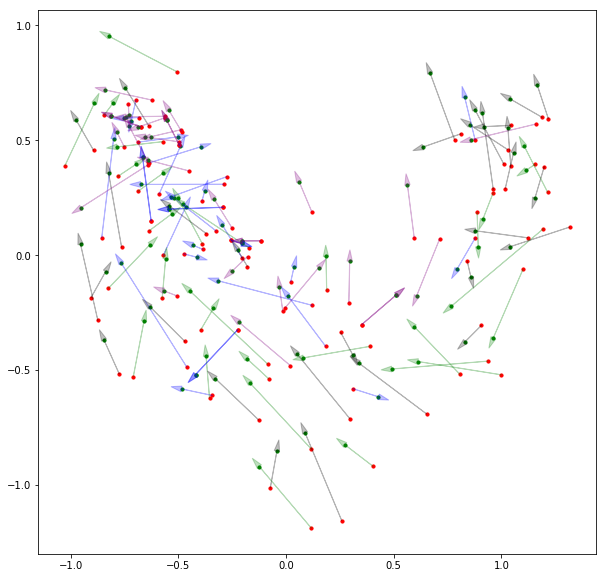

Cluster 36 (3259 words)
[ 0.00769783 -0.14087826 -0.09033199 -0.02954827  0.06177704 -0.10103378
  0.05655416  0.25091597  0.01046485 -0.0440213   0.06928582 -0.06832674
 -0.14081578 -0.08595376 -0.04873341  0.00753151  0.12124961  0.00473817
  0.24442968  0.0388201   0.06193998 -0.19119503 -0.07468327  0.00908583
 -0.15624136  0.13781719  0.00992645  0.02228115 -0.1341336  -0.00902899
 -0.06141736 -0.21857491]
{'nmod': 808, 'nsubj': 598, 'obl': 396, 'obj': 202, 'acl': 177, 'conj': 168, 'advmod': 105, 'case': 105, 'amod': 99, 'det': 96, 'appos': 62, 'cc': 61, 'compound': 58, 'punct': 57, 'mark': 43, 'xcomp': 41, 'advcl': 34, 'ccomp': 34, 'aux': 25}
0.58518064
[['I enjoyed working with all of you during the past five years at Enron / Azurix , and I wish you all of the best .'
  '13' 'Enron']
 ['i have not gotten a good response so i think shanna and i are going to stay in town .'
  '10' 'shanna']
 ["Dans ce même ouvrage , il répond aux détracteurs de Monet , qui reprochent à l' artiste 

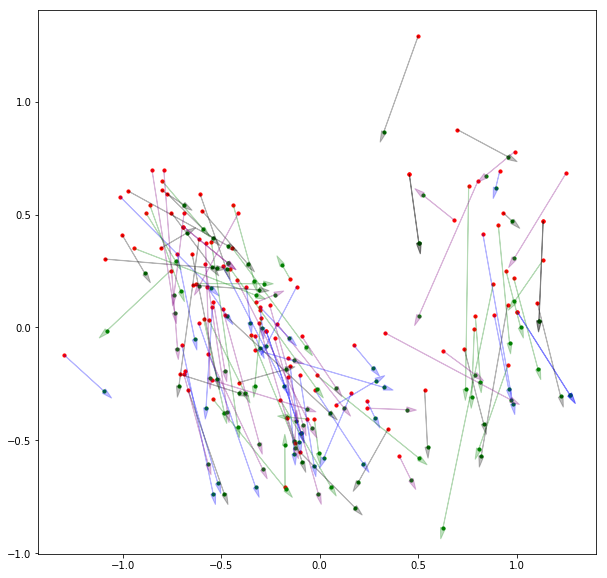

Cluster 37 (3258 words)
[-0.09754818  0.12658028  0.15029089 -0.14778583  0.07381357 -0.15782252
 -0.34032875 -0.23059455  0.0996815  -0.09002291  0.20254834  0.04136435
  0.20992965 -0.28589603  0.16706327  0.03600558 -0.10666683 -0.01379058
  0.33314732 -0.02686933 -0.02249094  0.3559221  -0.0394816   0.0248207
  0.03078091 -0.02875765  0.04313678 -0.06200471  0.22792733  0.07346934
  0.06608146 -0.14835641]
{'punct': 3236}
0.27954757
[['Jurusan yang ada di SMK Negeri 7 Pandeglang : SMK Negeri 7 Pandeglang menyediakan kegiatan ekstrakurikuler yang berkualitas mendidik serta mampu membina dan melatih jiwa kepemimpinan peserta didiknya .'
  '28' '.']
 ['4 ) Kreikka ja Belgia ovat tehneet edellä mainittuja mahdollisuuksia koskevat poikkeuslupahakemukset , ja'
  '13' 'ja']
 ["Le pays a besoin de travailler davantage , pour poser les jalons d' une économie forte et structurée ."
  '18' '.']]


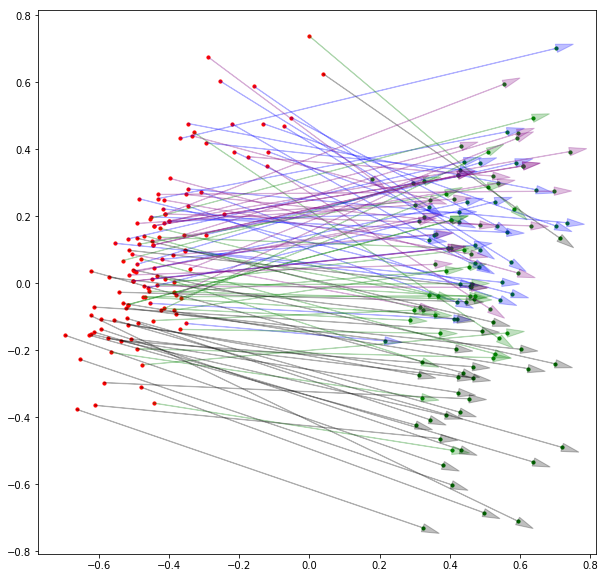

Cluster 38 (2582 words)
[-1.3844179e-01 -3.8954578e-02  1.3732387e-02  8.3882585e-02
 -1.2334695e-02  1.5449415e-01  3.3832256e-02  1.8431228e-01
  7.6357350e-02  5.2522179e-02  5.7019040e-02  9.9381350e-02
 -1.4754559e-01 -1.7138784e-01  1.0987517e-01  1.8886793e-02
  1.8275569e-01  6.5344274e-02 -2.3819368e-02 -2.7564791e-01
 -9.3887746e-03 -3.2445367e-02 -5.3148651e-03  6.1850581e-02
  2.6881415e-04 -2.5683078e-01 -1.4584142e-01 -6.2307298e-02
  2.3752760e-02 -1.4027387e-01  9.0461180e-02 -7.1520552e-02]
{'conj': 1517, 'cc': 450, 'nmod': 100, 'punct': 82, 'flat': 43, 'fixed': 41, 'appos': 40, 'amod': 34, 'case': 34, 'compound': 30, 'nsubj': 30, 'obj': 30, 'advmod': 29, 'obl': 28}
0.6476548
[['Los centros de enseñanza , públicos y privados , también han dado vacaciones hasta el jueves a sus alumnos y sólo se mantienen operativas las emergencias hospitalarias , policía , bomberos y demás servicios imprescindibles .'
  '7' 'privados']
 ['Cada operador participante de Iber-X publica su 

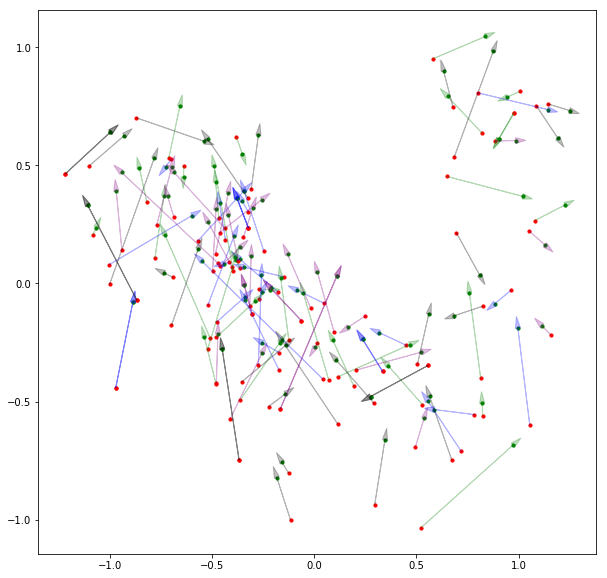

Cluster 39 (2364 words)
[ 3.4805253e-02 -2.8250532e-02 -4.6349607e-02 -4.5913532e-02
  3.9042614e-02 -1.2130337e-02 -5.6366678e-02 -3.4118560e-01
 -8.7598898e-04 -2.4992010e-02  3.8394518e-03  1.8500471e-01
 -4.2242728e-02 -2.1693796e-02  9.8221880e-01 -6.5260127e-02
  1.0369884e-01 -2.0330941e-02 -5.2896470e-02  2.0179957e-02
 -3.5001218e-02  3.1400362e-01 -7.7490933e-02 -1.5609412e-01
 -1.9556668e-02  1.2096640e-02  6.0054347e-02  1.8807188e-02
 -5.8443122e-02  3.8575102e-02  2.7775889e-02 -2.5409600e-02]
{'conj': 733, 'advcl': 288, 'punct': 224, 'obl': 210, 'ccomp': 206, 'acl': 171, 'parataxis': 133, 'obj': 60, 'cc': 51, 'nmod': 45, 'xcomp': 43, 'dep': 35, 'appos': 33, 'case': 29, 'advmod': 26}
0.5052633
[['وشدد كاسترو الذي اهداه رئيس مجلس كنائس كوبا رينيرو ارسي نسخة من الانجيل على دور الكنائس البروتستانتينة الكوبية والاميركية في عودة اليان الى مسقط رأسه .'
  '14' 'دور']
 ['You wear your heart on your sleeve ... and since you are an emotional person you are apt to give your all ... 

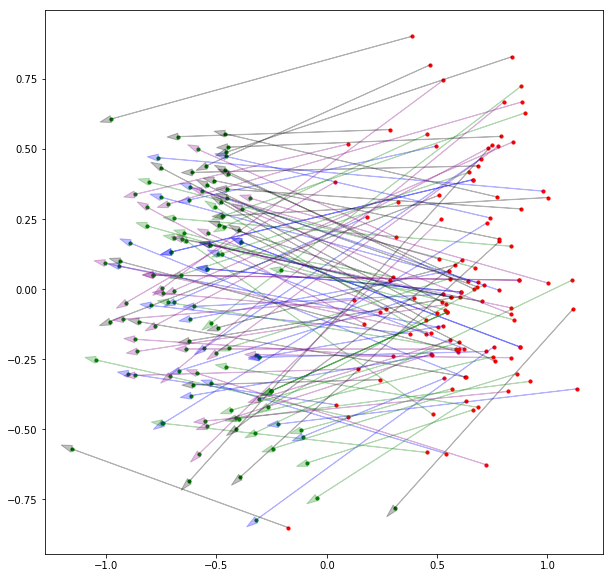

Cluster 40 (1382 words)
[-1.62187405e-02 -6.52401429e-03  5.34626693e-02  6.35150149e-02
 -2.58276444e-02 -1.10801449e-02  3.93218398e-02  5.44729710e-01
 -9.34153721e-02  8.64582881e-03  8.21526907e-03 -9.36349407e-02
 -2.62169167e-02  1.85616594e-02 -8.22041690e-01  3.71717364e-02
 -2.46009994e-02 -4.98247631e-02 -1.19260505e-01 -1.27675375e-02
  3.94458398e-02 -2.52512574e-01  5.97624294e-02  6.24082459e-05
 -4.05981243e-02 -5.92078157e-02 -2.00932566e-03  1.94300152e-02
  1.39049664e-02 -6.63516149e-02 -1.60694774e-02 -3.29417139e-02]
{'nsubj': 271, 'obl': 203, 'punct': 183, 'advcl': 161, 'ccomp': 111, 'acl': 99, 'dep': 90, 'nmod': 67, 'advmod': 56, 'mark': 30, 'obj': 24}
0.4591112
[['" We \'re not happy with Hamas \'s position at this stage and in light of the Israeli escalation against the Palestinians , " commented Khader Habib , a senior Islamic Jihad official .'
  '4' 'happy']
 ['Pour ce syndiqué Force Ouvrière , " la chute des commandes au Portugal , en Grèce , en Espagne et 

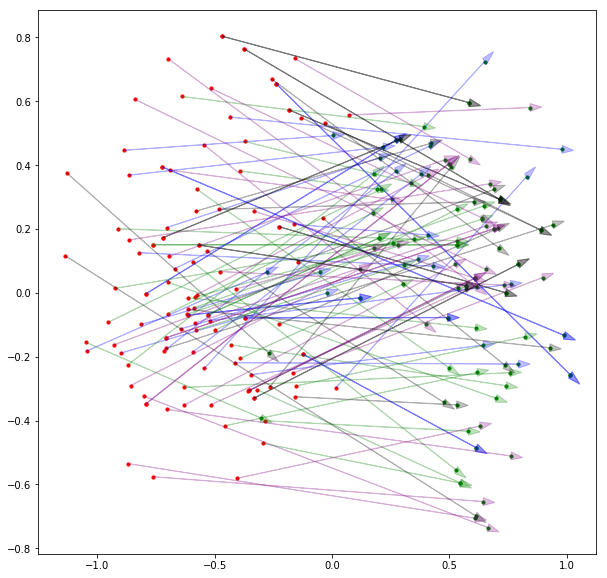

Cluster 41 (3104 words)
[ 0.11016224 -0.0872917   0.00100854  0.21010682  0.05863905 -0.05980767
 -0.12347703  0.11630142  0.0491001  -0.13771532  0.03240093 -0.33097237
  0.03168732  0.01394727  0.08772783 -0.03855851  0.27653757 -0.1389002
  0.11462539 -0.09628395 -0.24470317 -0.0210665  -0.15673964 -0.16371453
  0.03875114  0.01792904  0.03481634  0.07511872  0.16766676 -0.02664803
 -0.07840657  0.08289494]
{'nmod': 1172, 'amod': 729, 'obl': 423, 'nsubj': 264, 'flat': 185, 'obj': 109, 'case': 40, 'appos': 35, 'compound': 30, 'acl': 27}
0.6068219
[['Le général Jan Krukowiecki , fort de cette victoire , se priva du coup décisif qui , sous le commandement de Ivan Shakhovskiy devait plus tard renforcer les armées russes .'
  '29' 'russes']
 ['وكان ايرفاين ، الذي حل في المركز الاول في جائزة النمسا العام الماضي على سيارة فيراري ، شعر بآلام في بطنه اضطرته الى الانسحاب من التجارب ، وهو سيعود الى لندن لاجراء الفحوصات الضرورية حسب ما اشار فريق جاغوار .'
  '10' 'النمسا']
 ['واوضحت صحيفة " اليو

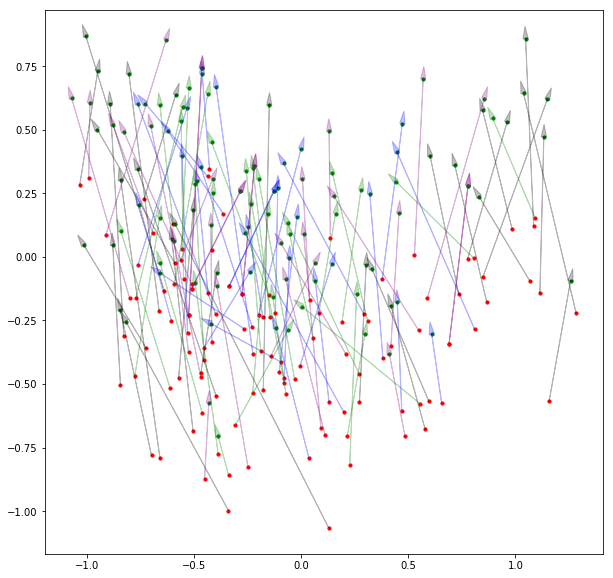

Cluster 42 (4262 words)
[-0.14067072  0.07078384 -0.19940026 -0.15690559  0.01321699  0.17352912
  0.07592613  0.05407071  0.00566374 -0.2592999   0.1212252   0.03761798
  0.19752373 -0.00079023  0.01465004 -0.06839478  0.01398794  0.07162126
 -0.08601716 -0.02806355  0.03742389 -0.12460788 -0.1088383   0.16353467
 -0.03515501  0.06149775  0.24644406 -0.09960641 -0.05867927 -0.0356647
 -0.11500455  0.03914503]
{'amod': 2865, 'advmod': 359, 'det': 208, 'nmod': 146, 'acl': 109, 'compound': 98, 'nummod': 85, 'obl': 78, 'case': 76, 'obj': 43, 'xcomp': 38, 'nsubj': 36, 'appos': 22}
0.5216709
[['UN - Generalsekretär Butros Butros - Ghali hat die internationale Gemeinschaft zu sofortiger Hilfe für die rund 400 000 Flüchtlinge in Sri Lanka aufgerufen .'
  '12' 'sofortiger']
 ["Il comporte , de part et d' autre , un pilastre cannelé , à deux registres et il surmonté d' un oculus , lui même surmonté d' une petite ouverture en plein cintre ."
  '23' 'lui']
 ['Totally flavored' '0' 'Totally']]


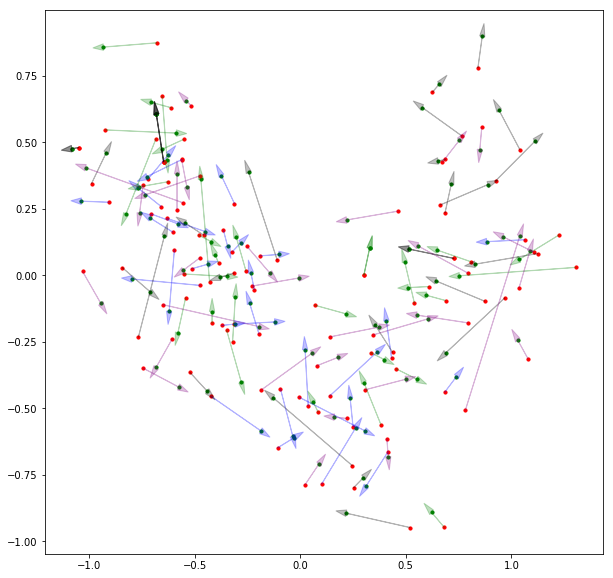

Cluster 43 (2048 words)
[-0.13042064  0.14121558  0.11183523 -0.09620523  0.02518178 -0.08986095
 -0.4045823  -0.3200653   0.04399505 -0.05087567  0.15828772 -0.01956542
  0.2172436  -0.19359009 -0.57509613  0.01858695 -0.07181406  0.06750719
  0.2746182  -0.03420866 -0.03112854  0.08350912 -0.06009598  0.00448272
 -0.10312237 -0.0851341  -0.0872583  -0.04934608  0.26381403  0.01112357
  0.02176618 -0.12666023]
{'punct': 2032}
0.36902678
[["Bürgermeister Christian Ude ( SPD , ) Bayerns Jusos , die Grünen und Gipfelgegner kritisierten das Polizeivorgehen und den `` Münchner Kessel '' als `` völlig unangemessen '' und zum Teil `` brutal '' ."
  '34' '.']
 ['En caso de que ninguno de los candidatos obtenga esa puntuación , los dos más votados tendrían que presentarse a una segunda ronda de votaciones 45 días más tarde .'
  '29' '.']
 ['Wurde sehr gut von der Kanzlei Singewald verteitigt und gewonnen .'
  '10' '.']]


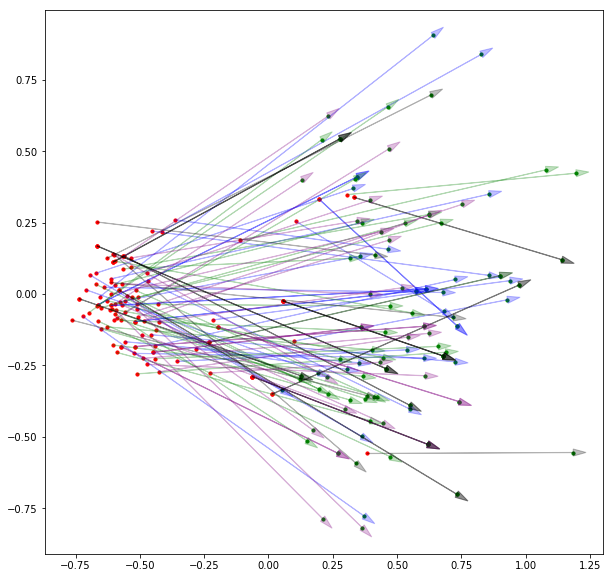

Cluster 44 (2894 words)
[-0.09761677  0.13233264 -0.02181375 -0.05284875 -0.01744956  0.09748857
  0.04206769 -0.13157862  0.06258062 -0.04333752 -0.01503563  0.13971616
 -0.05302548  0.07020983 -0.11345731  0.02689531 -0.00818082  0.10675221
 -0.11832447  0.02802284 -0.07890124 -0.22906065  0.08858927 -0.22771983
  0.039254   -0.09897614  0.2128876   0.01932375  0.19835791  0.04403486
  0.0196977  -0.01697212]
{'nmod': 373, 'advmod': 288, 'acl': 250, 'obl': 243, 'conj': 235, 'nsubj': 212, 'case': 170, 'punct': 164, 'amod': 139, 'mark': 127, 'cc': 116, 'appos': 91, 'obj': 68, 'det': 62, 'advcl': 57, 'aux': 43, 'nummod': 34, 'compound': 32, 'ccomp': 29, 'flat': 29, 'xcomp': 29, 'cop': 26}
0.6778217
[['by the way , buy it now b/c it is going to 100 by year end .' '7'
  'b/c']
 ['Kota ini tumbuh dari asalnya yang tak dikenal sebagai koloni orang Funisia di Afrika Utara dan melebar sampai lereng Perbukitan Sahel serta pulau lepas pantai ( direklamasi ) .'
  '4' 'asalnya']
 ['以下 是 一些 常見 的 咖

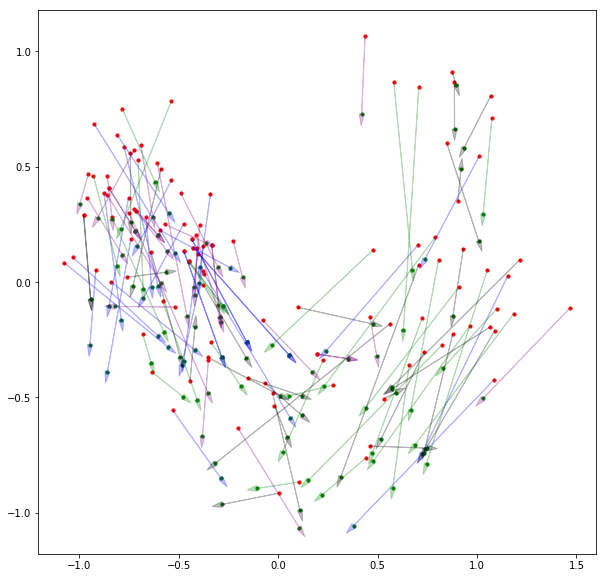

Cluster 45 (2523 words)
[ 0.06824436  0.11349886 -0.10919743  0.20842052 -0.1530266   0.12171606
  0.0124006  -0.10608103 -0.06234407  0.03740068  0.20959738 -0.0271726
 -0.0244217  -0.08473714 -0.01421729  0.02876415 -0.09947577  0.0358463
 -0.05613768 -0.02525618 -0.00624939  0.03895039 -0.11756629  0.06085644
  0.04922919  0.03478281  0.14576337  0.19068709 -0.00519174  0.00815693
 -0.10821681  0.13817349]
{'advmod': 808, 'fixed': 240, 'punct': 233, 'case': 177, 'amod': 175, 'obl': 163, 'nmod': 144, 'mark': 76, 'obj': 70, 'cc': 59, 'cop': 47, 'nsubj': 44, 'det': 36, 'acl': 32, 'xcomp': 31, 'appos': 30, 'flat': 27, 'conj': 25, 'compound': 22}
0.5415443
[['قال الحكيم إنه سيتم أيضا عقد جمعية عامة عادية يوم 29 فبراير الجاري المناقشة نتائج أعمال الشركة عن العام الماضي 2003 واعتماد تقريري مجلس الإدارة ومراقبي الحسابات عن نشاط الشركة عن نفس العام .'
  '4' 'أيضا']
 ['Además , se comprometerán a realizar los esfuerzos necesarios para dotarse en los próximos años de medios de transporte estra

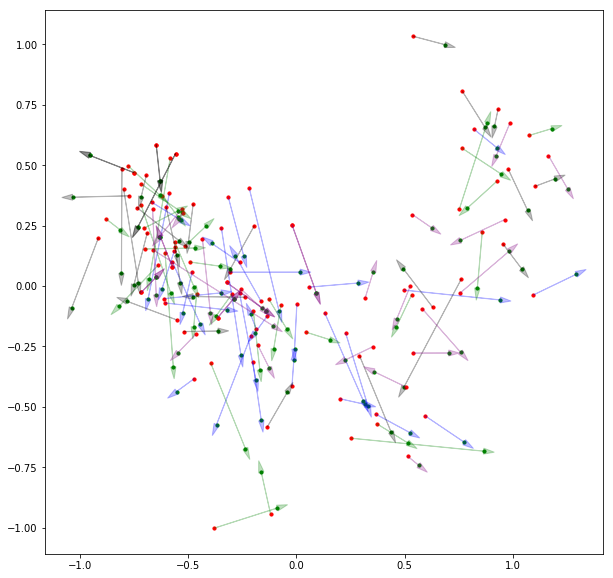

Cluster 46 (3948 words)
[-0.1451762  -0.09622549 -0.03350462 -0.08828298  0.12111299 -0.14607677
  0.05964972  0.03000205  0.1315539   0.05299328 -0.06748785  0.02119409
  0.212946    0.00303325  0.02708479 -0.08339421  0.1368213  -0.06851678
  0.01456817  0.13670604  0.15423018 -0.08444452 -0.06088949  0.05150458
 -0.13408627  0.02342287  0.10593901 -0.09500587 -0.03992099 -0.12441762
 -0.15248473  0.09628376]
{'compound': 1009, 'nmod': 1008, 'case': 557, 'amod': 434, 'obl': 198, 'nsubj': 140, 'obj': 107, 'advmod': 84, 'det': 62, 'xcomp': 52, 'punct': 47, 'nummod': 40, 'acl': 37, 'flat': 30, 'mark': 26}
0.53744733
[['Le Handball Club Baník OKD Karviná est un club de handball basé à Karviná en République tchèque .'
  '1' 'Handball']
 ['周 成建 是 中國 的 著名 浙 商 及 企業 家 , 2009 年 以 個人 資產 達 136億 元 人民 幣 上榜 福布斯 中國 富豪 榜 .'
  '20' '人民']
 ['現存 的 雙吉 寺 建築 為 明朝 建築 , 整體 坐北 朝南 .' '2' '雙吉']]


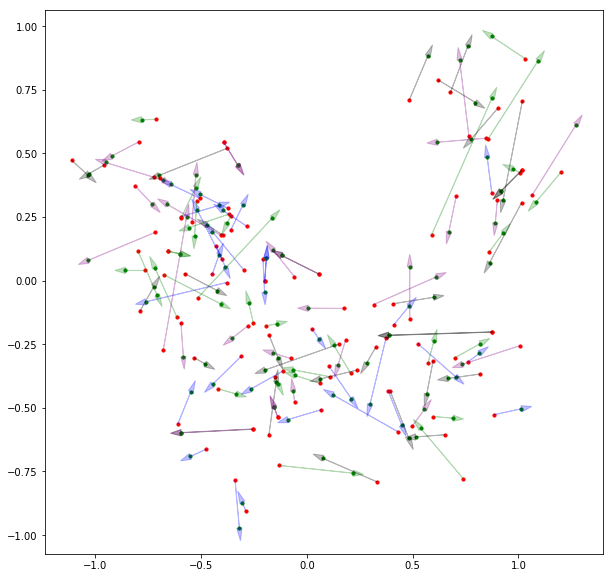

Cluster 47 (3531 words)
[ 0.16369317  0.00562937  0.02685191 -0.06817797  0.20194407 -0.08348329
  0.03989393 -0.04375742 -0.00977208  0.14479323 -0.20054144  0.11005577
 -0.04983627 -0.09007426  0.00615074 -0.11239673 -0.0007435   0.0767014
 -0.07175241  0.24285223 -0.38046446 -0.02632819  0.07894745  0.19529188
  0.10961813  0.06063109 -0.01999746 -0.16279031  0.07996264  0.03239046
 -0.21362129 -0.09712581]
{'case': 2657, 'mark': 611, 'nmod': 34, 'punct': 33, 'fixed': 32, 'det': 26, 'nsubj': 24, 'advmod': 23, 'flat': 21}
0.65669596
[['法國 地質 學家 Gromaget ( 1934 ) 在 研究 越南 的 地層 時 , 首次 提出 印 支 運動 的 概念 .' '19'
  '的']
 ['" Nous apprécions les efforts de l\' Algérie dans le domaine de la lutte contre le terrorisme , tant au Maghreb que dans la région du Sahel ou ailleurs et nous en sommes très reconnaissants " , a affirmé M. Benjamin dans une conférence de presse tenue à l\' ambassade des Etats-Unis à Alger .'
  '44' 'de']
 ["Le Muséum a publié des recommandations sur la pollution lumineuse 

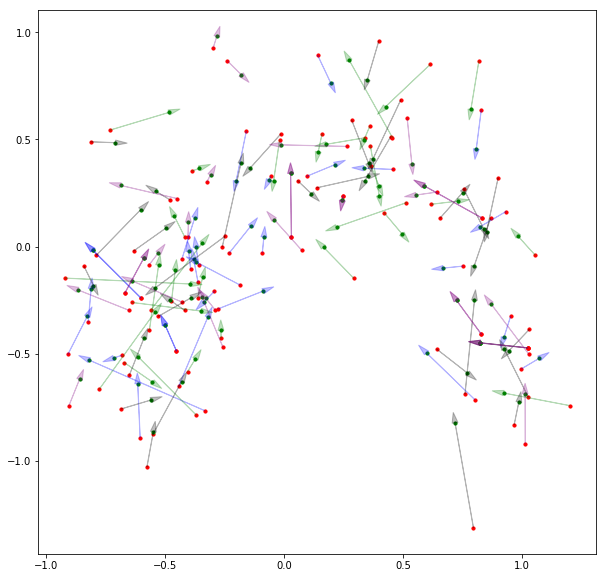

Cluster 48 (3867 words)
[ 0.08957225  0.0272955   0.08330875  0.06669638 -0.1163534  -0.08638312
  0.04607344 -0.02624264 -0.15630832 -0.22962792 -0.2639305   0.02499095
 -0.12474424 -0.15610932 -0.00126567  0.06137333  0.03207511  0.12818275
 -0.00823289 -0.08090009  0.01265474  0.0193608   0.25204736  0.01895271
 -0.24709575  0.22362956  0.0106595  -0.04795921  0.1630891   0.04871565
  0.07716104  0.18287763]
{'det': 3634, 'nsubj': 57, 'obj': 25, 'case': 23}
0.53853154
[['Al menos 23 empresas exportadoras de café de Honduras han quebrado en los últimos tres años , muchas de ellas por el impacto del bajo precio del grano en el mercado internacional , informó hoy , Martes , una fuente empresarial .'
  '21' 'el']
 ['El presidente se negó a revelar el nombre de la delegación , y agregó la " única preocupación " del sector renovador es decapitarle .'
  '6' 'el']
 ['Paul Pelliot ( né le 28 mai 1878 à Paris -- mort le 26 octobre 1945 à Paris ) est un linguiste français , sinologue et tibéto

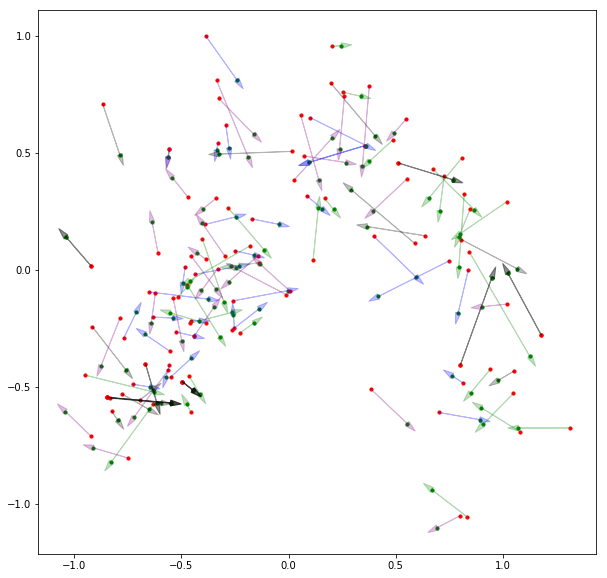

Cluster 49 (4536 words)
[ 0.08836494 -0.12859403 -0.00886985 -0.16871248  0.0221264  -0.04365141
  0.2576166   0.02742702 -0.06365443  0.05668817  0.01683138  0.01257654
 -0.0123582   0.18219763 -0.00542986  0.11669637 -0.0491588  -0.23491168
  0.00408004  0.10120475 -0.07247765 -0.04861411 -0.26980382 -0.01373384
 -0.20291452 -0.1779319  -0.02309518 -0.12957929  0.25380772  0.15206459
  0.04394579  0.00509656]
{'case': 4229, 'advmod': 67, 'mark': 46, 'obl': 43, 'compound': 34, 'nmod': 33}
0.6387683
[['أعلنت وزارة الاتصالات والمعلومات المصرية عن الترتيبات النهائية لمعرض " أفريكا تيلكوم 2004 " الذي تستضيفه القاهرة خلال الفترة من 4 إلى 8 مايو القادم بمشاركة نحو 40 وزير اتصالات أفريقيا وأكثر من 4 وفود و 100 من كبار المسؤولين العالميين .'
  '28' 'وزير']
 ['Tika membeli makanan di warung Mpok Yati , mereka membicarakan Bunga .'
  '4' 'warung']
 ['El no va más lo alcanzan aquellos animales que cambian de color al momento o incluso mudan sus pieles o plumas para adecuarse a los tonos cromátic

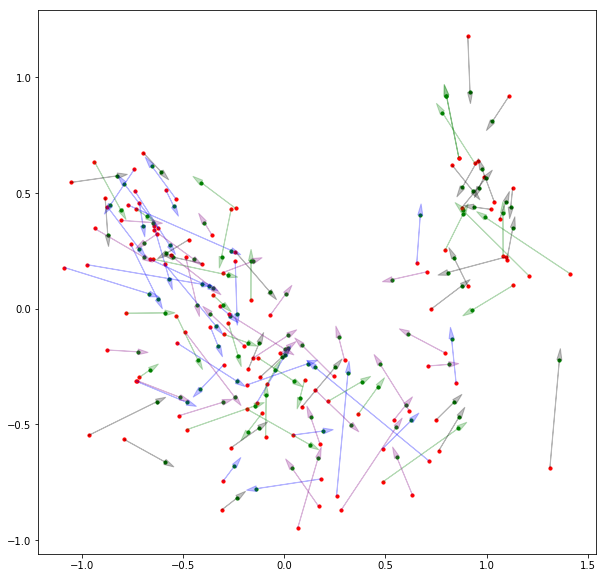

Cluster 50 (2980 words)
[-0.02014225 -0.09373824 -0.06797147  0.02014569  0.05122796 -0.03810254
 -0.21677086  0.02068534 -0.08647104  0.01820057  0.06699899  0.04440422
 -0.32031322  0.03181516  0.27463117 -0.10405965 -0.09689356  0.15307343
  0.17592198  0.01103241 -0.03756827 -0.07869845 -0.16747971 -0.18517736
 -0.21971521  0.01121839  0.05687013 -0.04290285 -0.07444063  0.0055823
 -0.07135452 -0.13814211]
{'nmod': 548, 'conj': 434, 'obl': 427, 'acl': 267, 'obj': 181, 'appos': 158, 'punct': 116, 'case': 100, 'advcl': 98, 'ccomp': 89, 'xcomp': 89, 'nsubj': 68, 'cc': 67, 'advmod': 57, 'flat': 51, 'amod': 48, 'mark': 39, 'parataxis': 22}
0.5243017
[["Depuis l' âge de 15 ans il façonne le bois afin de réaliser ou de restaurer les plus beaux instruments du quatuor ( alto , violon , violoncelle , contrebasse ) ."
  '21' 'quatuor']
 ['Le premier CD contient quatorze chansons interprétées lors de divers concerts par la formation originale en trio durant les deux premières années d\' existe

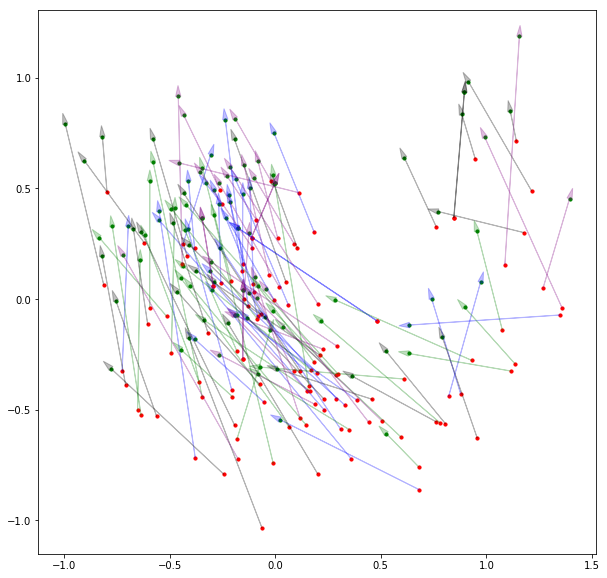

Cluster 51 (3048 words)
[ 0.1562733   0.11885212  0.36404845 -0.02512427 -0.08106947  0.11744629
 -0.00223873 -0.11344282 -0.09841511 -0.04653643 -0.02762475  0.061485
 -0.15698451 -0.10826233 -0.08477548  0.11067083  0.05666777 -0.41643852
 -0.21120694  0.13236754 -0.03159855  0.16000892 -0.00086075 -0.00222465
 -0.04944812  0.13316604  0.3985202  -0.17154822 -0.0366425  -0.3588122
 -0.0736139  -0.25229716]
{'punct': 3011}
0.68629736
[['Pero el 16 de junio pasado , el Consejo de Administración de la Oficina Europea de Patentes ( OEP ) decidió incorporar una controvertida directiva sobre patentes de biotecnología que permite que los seres vivos tengan un dueño .'
  '3' 'de']
 ['Arvoisa puhemies , olen todellakin sitä mieltä , että meidän kannattaisi käsitellä sitä yhteiskeskustelun yhteydessä , sillä en haluaisi meidän joutuvan huomisaamuna uuteen keskusteluun , josta seuraisi äänestys torstaina eli 48 tuntia myöhemmin .'
  '15' ',']
 ["La naturalisation ne sera possible qu' au bout de

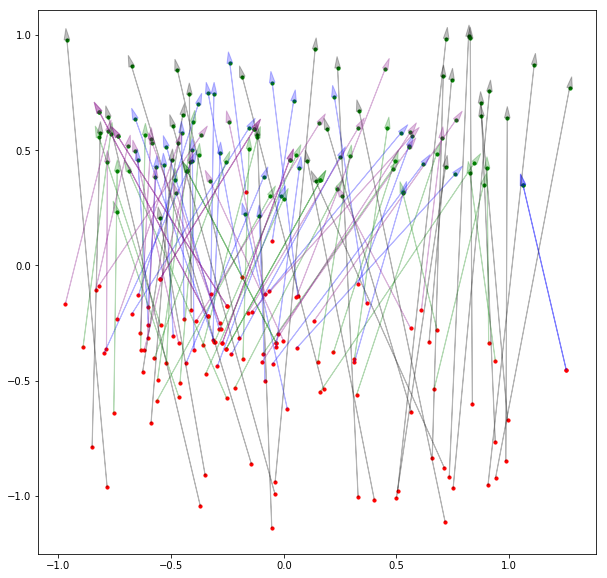

Cluster 52 (4863 words)
[-0.00694765  0.03677849  0.07391303  0.01135412 -0.04659539  0.00283951
 -0.26242986  0.13908902  0.09437301  0.04321617 -0.0298451  -0.01991179
 -0.27292982  0.06047699  0.05660302  0.13350642  0.2921765  -0.08975788
  0.05929242 -0.15320319 -0.04105175 -0.00927216 -0.00978325  0.08683474
  0.15117975 -0.04125401 -0.03841866  0.0902262   0.00818332  0.18427172
 -0.1145615   0.09601047]
{'flat': 1989, 'nmod': 1188, 'appos': 433, 'nsubj': 409, 'amod': 165, 'obl': 146, 'obj': 132, 'compound': 61, 'advmod': 39, 'nummod': 39, 'conj': 35, 'xcomp': 32, 'punct': 31, 'acl': 30, 'det': 23}
0.57721114
[['Tres veces negó el líder peneuvista que su partido se vaya a " tirar al monte " en septiembre , cuando concluya el ultimátum que el lehendakari , Juan José Ibarretxe , dio a José María Aznar para traspasar las competencias pendientes a Euskadi .'
  '30' 'Ibarretxe']
 ['بوابة السياسة حملت للعالم العربي اجابة متوجة بين رفض وقبول وتمنع وحماس هي بالضبط ما صنع قصة السياسة الع

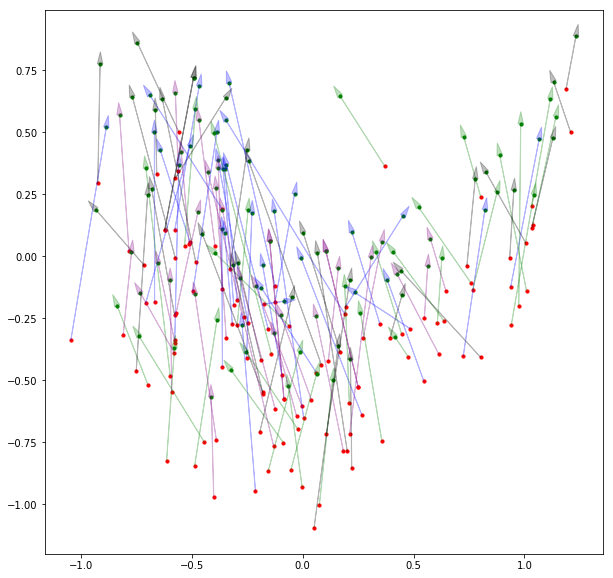

Cluster 53 (2505 words)
[-0.13851444 -0.15156163  0.01974989 -0.22162578  0.03920751  0.10431389
  0.1172044  -0.00617684  0.0707963  -0.04863524  0.1822051  -0.01194327
  0.0374053   0.05696562 -0.0619711   0.01510191 -0.0462843   0.06089241
 -0.08793689 -0.19284868 -0.24777523  0.00274958 -0.00598238 -0.07006302
 -0.07691188  0.2719014   0.0754019  -0.18730807 -0.08180534  0.03388893
 -0.11018323  0.04309915]
{'det': 1554, 'nmod': 216, 'amod': 145, 'cc': 100, 'punct': 71, 'nsubj': 64, 'case': 63, 'obl': 44, 'advmod': 38, 'nummod': 36, 'obj': 28, 'mark': 25, 'compound': 22, 'clf': 21}
0.61785185
[['واضافت الصحيفة ان عددا من كبار الضباط في الجيش اعربوا عن قلقهم حيال هذا المشروع لاعادة انتشار القوات البريطانية في شمال العراق الذي تتحدث عنه الصحف البريطانية منذ الجمعة الماضي .'
  '13' 'هذا']
 ['Paistettu kiinankaali on hyvää ihan tällaisena perusversionakin , tosin aneemisen näköistähän se on'
  '5' 'tällaisena']
 ['異端 裁判 所 的 正式 名稱 為 「 最高 宗教 法庭 」 , 其 目的 在 於 抑制 異端 的 興起 , 防止 教會 的 分裂 .'
  '

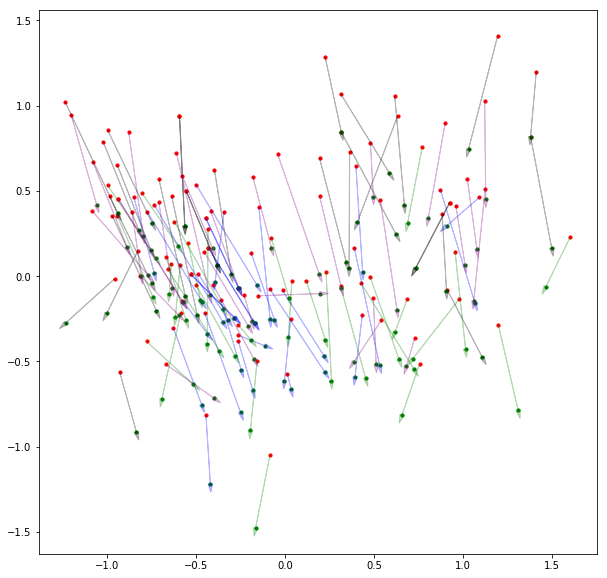

Cluster 54 (2054 words)
[ 0.03301117 -0.00552568 -0.35031486  0.04572792 -0.02460681 -0.12716469
 -0.00326293 -0.04149237 -0.03588654  0.1527653   0.08031803 -0.13551459
 -0.08805434  0.04883439 -0.02563782  0.08787338 -0.22297303 -0.23064956
  0.02882679  0.17499454 -0.17259678 -0.14887576  0.3454742  -0.09981967
  0.03121911 -0.01123818  0.06172635  0.05302751 -0.19364801 -0.06173511
  0.08490357  0.11513723]
{'mark': 1294, 'punct': 196, 'fixed': 150, 'cc': 68, 'case': 62, 'advmod': 58, 'obj': 58, 'obl': 39, 'nsubj': 29}
0.517966
[['Turnamen ini memasuki edisi kesembilan dan merupakan bagian dari ATP Challenger Tour 2011 .'
  '11' 'Tour']
 ['Ibarretxe , que " reafirmó " su " compromiso con la paz , la democracia , la tolerancia y la pluralidad de la sociedad vasca " , recalcó que el PNV tiene " su propio camino , y no nos van a desviar ni las bombas ni los huracanes mediáticos " .'
  '28' 'que']
 ['Poco sabemos de los primeros momentos : parece que la mujer y la víctima se conocían ,

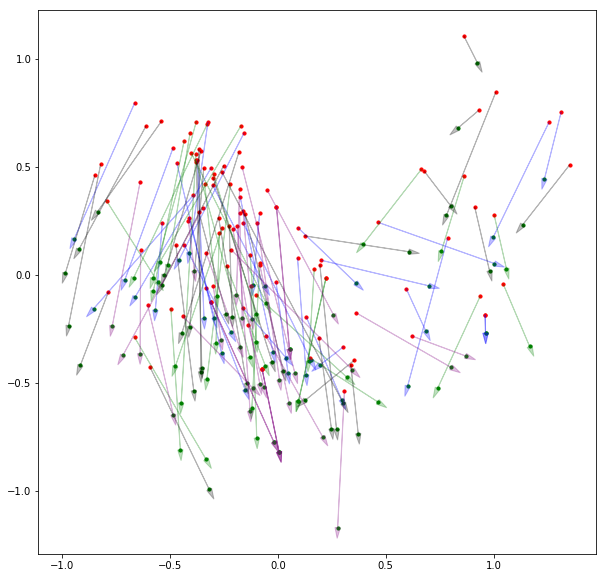

Cluster 55 (2671 words)
[ 0.24387331  0.21508187 -0.02396329  0.01338287 -0.13467558  0.1743896
  0.12733088 -0.11195456  0.11529879 -0.12078301 -0.03813646 -0.07992823
 -0.03694517  0.2613666  -0.10708934 -0.22151543 -0.06902525  0.10093866
  0.05237301  0.00287181 -0.04494757  0.09956783  0.07709721 -0.05772292
  0.03159167 -0.0391713  -0.15203454 -0.14566088 -0.01938365 -0.12136393
 -0.0958727  -0.01222435]
{'aux': 1898, 'cop': 221, 'advmod': 192, 'acl': 44, 'punct': 43, 'nmod': 39, 'mark': 36, 'case': 35, 'amod': 30}
0.4834115
[['El actual presidente de la entidad catalanista Òmnium Cultural , Josep Millàs , explicó ayer que ha propuesto al sector renovador que encabeza Jordi Porta la confección de una lista conjunta para las elecciones del 7 de marzo en la organización .'
  '16' 'ha']
 ['Alguien debería estudiar el fenómeno , que es ampliable a otros casos de asimilación popular de adelantos tecnológicos que aquí han tenido una adaptación más rápida que en la mayoría .'
  '20' 'ha

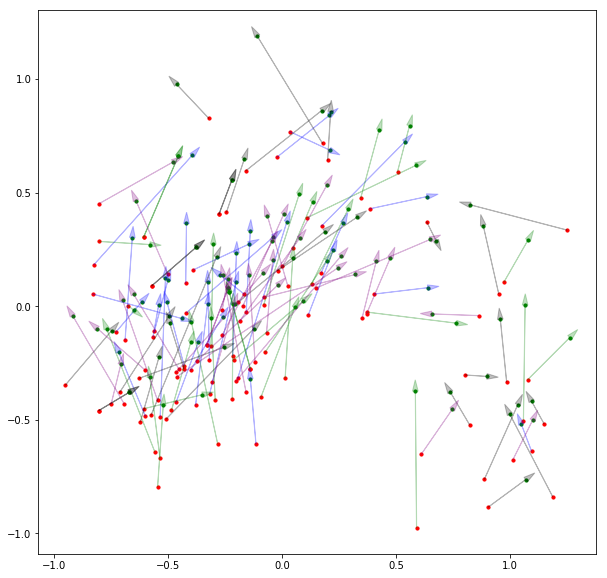

Cluster 56 (2550 words)
[-0.14663845  0.04041211 -0.31508175  0.01674058 -0.0465915  -0.08271098
  0.02580163  0.03002176 -0.2655729   0.0958133   0.06109305 -0.02724425
 -0.0315322  -0.13639618 -0.01521539 -0.04351056  0.03857667  0.08826635
 -0.1254979   0.05234742  0.00650256 -0.0231333   0.25911444 -0.02006698
  0.03834558  0.11171331  0.07523557 -0.18167806  0.04467093 -0.04455002
 -0.18699592  0.00744236]
{'det': 618, 'case': 539, 'punct': 346, 'mark': 192, 'advmod': 123, 'cc': 119, 'fixed': 109, 'obj': 75, 'expl': 64, 'nmod': 63, 'amod': 46, 'cop': 39, 'nummod': 37, 'acl': 34, 'nsubj': 28, 'obl': 25, 'aux': 22}
0.59738505
[["La cathédrale de l' Assomption est une cathédrale catholique située dans la ville de Segorbe , dans la communauté valencienne en Espagne ."
  '3' "l'"]
 ["La 023 est conçue par le bureau d' études Fondtech-Fondmetal , l' atelier de Gabriele Rumi dirigé par Jean-Claude Migeot et présente des pontons dont le bord de fuite est surbaissé et réduit dans la largeu

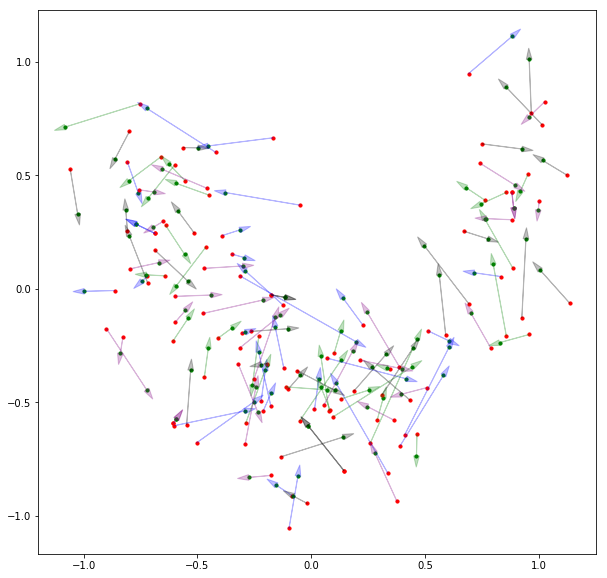

Cluster 57 (1441 words)
[-0.01717989  0.11370996  0.12376343 -0.02901483 -0.01757767 -0.02150306
  0.16521668 -0.6162704   0.0303138   0.07532321  0.05612963 -0.4430346
 -0.09755325  0.03592161  0.23745756  0.07004775  0.12388122 -0.03078264
  0.00666339 -0.06321383  0.03543568 -0.70108986  0.1734571   0.2500392
  0.04848478 -0.05996577 -0.02324472  0.06729666  0.16339663 -0.09667544
  0.04834227 -0.03232633]
{'conj': 378, 'acl': 173, 'obl': 153, 'advcl': 147, 'ccomp': 113, 'punct': 101, 'nmod': 84, 'cc': 74, 'obj': 39, 'appos': 37, 'case': 27}
0.6264285
[['El momento es delicado en lo deportivo y en lo organizativo y se necesita , retirado Genís Llamas , una persona que reúna el aprecio de la mayoría de los aficionados , como ocurre con Villacampa .'
  '33' 'ocurre']
 ['وقال القاضي وائل عبد اللطيف في حديث لـ " الشرق الأوسط " عبر الهاتف من مقر إقامته من مدينة البصرة ، التي يشغل أيضاً منصب محافظها ، إن القانون يقول إن المتهم بريء حتى تثبت إدانته ، وعلى هذا الأساس فإن صدام حسين حتى الآن 

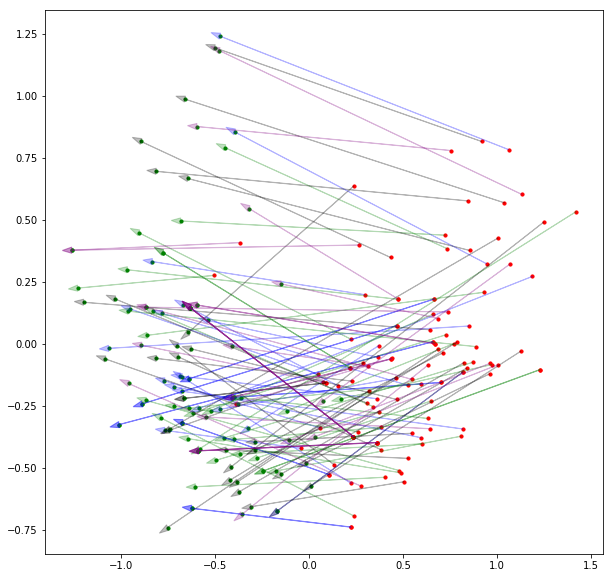

Cluster 58 (1717 words)
[ 0.06420271  0.07809645  0.11936523 -0.02374482 -0.07147687  0.0169709
  0.37890068  0.14192563  0.06064507  0.18325044 -0.0394767  -0.33312452
 -0.01066744 -0.0999776  -0.24535666  0.03768228 -0.08978556 -0.01866191
  0.07277395 -0.11155646  0.03849463 -0.14712763  0.15326892  0.25499973
  0.23788789 -0.01539215  0.22343643  0.02038174  0.07328328 -0.03387808
  0.12261584  0.13953432]
{'punct': 304, 'cc': 237, 'conj': 176, 'obl': 151, 'nsubj': 145, 'mark': 127, 'acl': 107, 'nmod': 88, 'advmod': 73, 'advcl': 58, 'obj': 43, 'ccomp': 42, 'case': 32, 'appos': 25}
0.7194755
[['وی در مورد تحولات فرهنگی در جمهوری اسلامی ایران گفت : دولت و حکومت در کشور ما به تکثرگرایی در حوزه فرهنگ اعتقاد دارند و در حوزه اندیشه و فکر شاهد تعددگرایی هستیم .'
  '11' 'دولت']
 ['En esa retirada ha habido algunas decepciones personales , pero también cartas inesperadas , como la que le envió Ramón Jáuregui , secretario general del PSE-PSOE , quien ya le ha hecho nuevas ofertas y que , - p

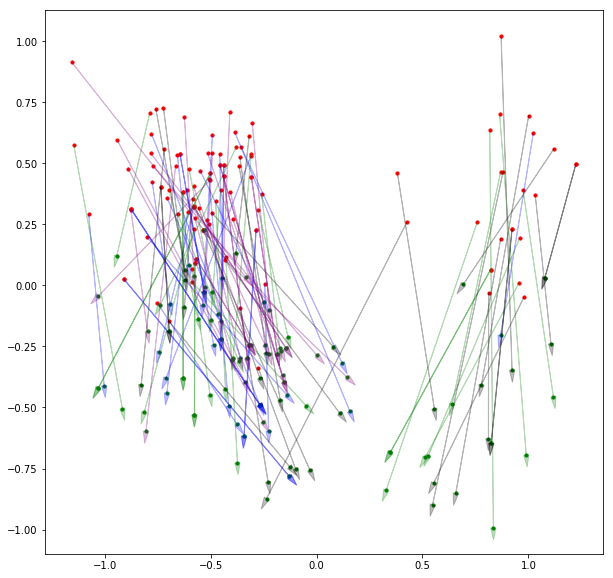

Cluster 59 (3030 words)
[-0.18936141 -0.05512503  0.1099914   0.20926636  0.01463843 -0.08035202
  0.05509475 -0.0176243   0.23337477 -0.15136461 -0.06755453 -0.02744245
 -0.01921595  0.0816458  -0.02879612 -0.07500203 -0.02192104  0.00660761
  0.07072399  0.15960734 -0.24581373 -0.02249639  0.13864373  0.03872348
 -0.13321432  0.2017237  -0.0091748  -0.13373184 -0.08291916 -0.07570217
  0.2698518   0.14686343]
{'det': 2370, 'nummod': 280, 'nmod': 113, 'nsubj': 51, 'aux': 39, 'obj': 35, 'obl': 29}
0.5119866
[['And I have to wonder : Did he forget that he already has a memoir called " A Charge to Keep " ?'
  '13' 'a']
 ['Can you send me the data you used : I shall take a look at it .' '12'
  'a']
 ['Iguazu is NOT a country ....' '3' 'a']]


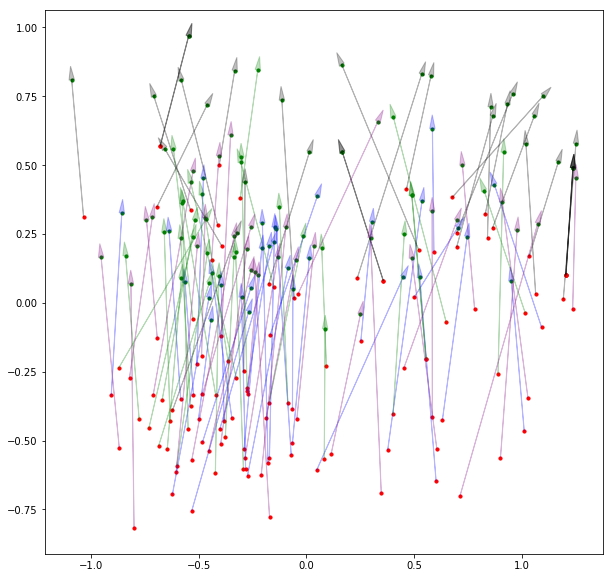

(3030, 2, 2)


In [20]:
NUM_TO_DRAW = 30

for cluster in range(kmeans.n_clusters):
  word_pairs = pairs[cluster_identities == cluster]
  print("Cluster {} ({} words)".format(cluster, word_pairs.shape[0]))
  print(kmeans.cluster_centers_[cluster])
  trimmedLabels = labels[cluster_identities == cluster]
  remove_languages = np.vectorize(lambda x: x.split('-')[1])
  cluster_labels, counts = np.unique(remove_languages(trimmedLabels), return_counts=True)
  print(dict([kv for kv in sorted(zip(cluster_labels, counts), key=lambda x: -x[1]) if kv[1] > 20]))
  pca = PCA(n_components=2)
  pca_data = pca.fit_transform(word_pairs.reshape(-1, 32))
  print(np.sum(pca.explained_variance_))
  pca_data = pca_data.reshape(-1, 2, 2)

  plt.figure(figsize=(10, 10))
  
  trimmed_extra = extra[cluster_identities == cluster]
  print(trimmed_extra[np.random.randint(low=0, high=trimmed_extra.shape[0], size=3)])
  
  colorMap = {
    "en": "blue",
    "fr": "green",
    "ar": "black",
    "de": "purple"
  }
  
  for lang in colorMap.keys():
    is_lang = np.vectorize(lambda x: lang in x)
    to_draw = pca_data[is_lang(trimmedLabels)]
    indices_to_examine = np.random.randint(to_draw.shape[0], size=NUM_TO_DRAW)
    to_draw = to_draw[indices_to_examine]
    for row in to_draw:
      plt.arrow(row[0][0], row[0][1], row[1][0] - row[0][0], row[1][1] - row[0][1], color=colorMap[lang], head_width=0.025, head_length=0.05, alpha=0.25)
    plt.scatter(to_draw[:, 0, 0], to_draw[:, 0, 1], c='red', label='en-subj', s=10, alpha=1)
    plt.scatter(to_draw[:, 1, 0], to_draw[:, 1, 1], c='green', label='en-verb', s=10, alpha=1)
    
  

  plt.show()
    
    
pca_data = pca_data.reshape(-1, 2, 2)

# ROW_TO_CHECK = 57
# pca_first_test = pca.transform(trimmedData[ROW_TO_CHECK][1].reshape(1, -1)).squeeze()
# assert np.allclose(pca_first_test, pca_data[ROW_TO_CHECK][1])

print(pca_data.shape)